## Lab 1: Time Series of Analysis of the El Ni&ntilde;o Southern Oscillation 
##### March 1, 2021
##### Jacinta Das


# Introduction

This lab is inspired by Lam et al. (2019), a "Time Series Study of Associations between Rates of People Affected by Disasters and the El Ni&ntilde;o Southern Oscillation Cycle." The El Ni&ntilde;o Southern Oscillation causes climactic variability and impacts the environment in many ways; it is has shown to be correlated with weather disasters around the globe. Although there is evidence of correlation between ENSO and weather disasters, there is little research investigating the health impact of this correlation. Lam et al. (2019) sought to study the association between ENSO and rates of people affected by disaster (PAD) to better understand the effect of the climate pattern on public health worldwide, specifically for the years 1964-2017. The researchers used two established indices of ENSO, the Oceanic Ni&ntilde;o Index (ONI) and the multivariate El Ni&ntilde;o Index and calculated a PAD rate using PAD data from the EM-DAT emergency events database (EM-DAT) and population data from the United Nations. Lam et. al (2019) conducted an analysis of ENSO and PAD rates at the global, regional, and country level. They completed a regression analysis using Poisson Generalized Additive Models and distributed-lag non-linear models. The researchers concluded that ENSO is correlated with health burden for PAD; the study is particularly useful because it provides PAD rates which can be used to highlight the most vulnerable regions and countries, and knowledge of the association may be helpful for the development of warning systems and other protection measures for minimizing health impacts of disasters, particularly in areas with a demonstrated need.

In this lab, I will perform a time series analysis of the El Ni&ntilde;o Southern Oscillation. Like Lam et al. 2019, I will use ONI and MEI data as ENSO indicess, and I will study the association of ENSO with global PAD rates. I will also examine seasonal rainfall in Los Angeles to investigate potential effects of ENSO on weather in the United States and to see how it generally correlates with the climate pattern. I have chosen to study the years 1964-2017 to stay consistent with Lam et al.'s timeframe. 

# Methods

First, I will install the tswge package, which will aid in time series analysis. 

In [ ]:
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("tswge")

### Data for Analysis

I will use five datasets in this analysis. Two of these, the Oceanic Ni&ntilde;o Index (ONI) and the Multivariate El Ni&ntilde;o Index (MEI), will be used as indices of ENSO. ONI is "a three-month moving average of sea surface temperature (SST) anomalies in the Ni&ntilde;o 3.4 region in the equatorial Pacific which is .5 °C above or below the average for that time of the year" (Lam et al. 2019). According to the National Oceanic and Atmospheric Administration (NOAA), an El Ni&ntilde;o event is classified when the ONI is above .5 °C for at least five consecutive overlapping three-month periods (Lam et al. 2019). There are four levels of intensity for an El Ni&ntilde;o event: very strong (ONI$\ge$2°C), strong (1-5-1.9°C), moderate (1-4°C), and weak (.5-.9°C). I can access and download the ONI data using "oni.ascii.txt", a plain text file. 

MEI is a two-month seasonal index integrating sea-level pressure, zonal and meridional components of the surface wind, sea surface temperature, surface air temperature and total cloudiness fraction of the sky in the tropical Pacific (Lam et al. 2019). According to Lam et al. (2019), "the scale and range of MEI are also comparable to those of the ONI." For this lab, I will assume the four levels of intensity used for classifying an El Ni&ntilde;o event by ONI can also be used for classifying by MEI. ONI and MEI data are available online through NOAA. To access the MEI data, I will load the HTML file associated with the data in the years of interest.

I use data from the EM-DAT emergency events database for information on People Affected by Disasters (PAD) by country and year. To be recorded in the EM-DAT database, disasters must meet one of the following criteria: there were 10 or more fatalities, 100 or more people were affected, a state of emergency was declared, or there was a call for internationl assistance. "People affected" refers to "people requiring immediate assitance during a period of emergency" (Lam et al. 2019). Lam et al. 2019 used data on the total number of people affected annually by country and year because it reflects the extent of the impact as opposed to a statistic such as total deaths, which does not include all who faced health consequences as a result of the disaster (Lam et al. 2019). To access this data, I created an online an account and customized a dataset so that it would include data for all regions between the years 1964-2017 for all disaster types except for technological, complex, extra-terrestrial (natural), and geophysical (natural). I downloaded the dataset as an Excel file and saved it as a comma-separated values (.csv) file. I uploaded this csv to a GitHub repository and imported it using the link.

I use World Bank data on annual population by country, with which I can calculate a rate of PAD per 1000 people. I was able to download this data in .csv format.

I found my fifth dataset in the Los Angeles Almanac. This dataset contains measurements of total seasonal rainfall in inches for seasons 1877-2020. I inputted the data into an Excel file, which I saved as a .csv and uploaded to my GitHub to link in. I inputted the seasons as calendar years for simplicity because seasons span calendar years from July 1 of one year to Jun 30 of the next year. I used the calendar year associated with the first half of the season; that is, 1964 represents the data from July of 1964 to June of 1965. I will keep this in mind when analyzing the correlation with ENSO.

1. Oceanic Ni&ntilde;o Index (ONI)
    - https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt 
1. Multi-variate ENSO Index (MEI)
    - https://psl.noaa.gov/enso/mei.old/table.html 
1. People Affected By Disasters (PAD) by country and year
    - https://raw.githubusercontent.com/jpdas18/hello-world/main/EMDAT.csv
1. Population Data by country and year
    - https://data.worldbank.org/indicator/SP.POP.TOTL
1. Total Seasonal Rainfall in Downtown Los Angeles
    - http://www.laalmanac.com/weather/we13.php 

### Loading and Processing Data
##### In this section, I will import each of the datasets and process them appropriately for the purposes of this lab. My goal is to create time series objects for ONI, MEI, PAD rates, and LA rainfall to analyze in my investigation of ENSO and its association with PAD rates and rainfall in LA.

##### Oceanic Ni&ntilde;o Index (ONI)
###### Download the ONI data as a text file from NOAA and convert it to a dataframe. 

In [ ]:
# Define the URL, scrub the file name from the URL and download to /tmp
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

In [ ]:
# Read directly to dataframe preserving the header
oni.df <- read.table(oni.file, header = TRUE) 

Subset the dataframe for the appropriate time period (1964-2017).

In [ ]:
# Create a dataframe with the years of interest (1964-2017)
oni.df = oni.df[!oni.df$YR > 2017,] 
oni.df = oni.df[!oni.df$YR < 1964,]

Lam et al. (2019) chose to use the ONI datapoint from the December, January, and February average to represent ENSO intensity in the years following December periods because El Ni&ntilde;o events "tend to become apparent at the tail-end of calendar years." I will also use the the ONI from this three-month period for my analysis of El Ni&ntilde;o events. 

Below, I subset the data so it only contains points for this time period.

In [ ]:
oni.fig1 <- subset(oni.df, SEAS == 'DJF')

I created a dataset for each level of intensity (very strong, strong, moderate, and weak) because I originally intended to investigate each level of intensity individually. In these datasets, the ONI values that do not fall within the range for the respective intensity are set to equal zero so it is possible to see only the events corresponding to the respective intensity. However, upon examining the realizations for El Ni&ntilde;o events at each intensity level, I realized it made more sense to combine them because each realization contained only 2-3 observations. I then applied the same methodology of setting other values to zero to create a dataset with very strong and strong intensities and a dataset with moderate and weak intensities. I also created a dataset for all El Ni&ntilde;o events, as defined by ONI > 5 °C, where all values less than .5 are set to zero.


In [ ]:
oni.vstrong <- oni.fig1
oni.vstrong[oni.vstrong$ANOM < 2,] <- 0
oni.strong <- oni.fig1
oni.strong[oni.strong$ANOM > 1.9,] <- 0
oni.strong[oni.strong$ANOM < 1.5,] <- 0
oni.moderate <- oni.fig1
oni.moderate[oni.moderate$ANOM > 1.4,] <- 0
oni.moderate[oni.moderate$ANOM < 1.0,] <- 0
oni.weak <- oni.fig1
oni.weak[oni.weak$ANOM > .9,] <- 0
oni.weak[oni.weak$ANOM < .5,] <- 0
oni.svs <- oni.fig1 # strong and very strong years 
oni.svs[oni.svs$ANOM < 1.5,] <- 0
oni.wm <- oni.fig1 # weak and moderate years
oni.wm[oni.wm$ANOM > 1.5,] <- 0
oni.wm[oni.wm$ANOM < .5,] <- 0
oni.elnino <- oni.fig1
oni.elnino[oni.elnino$ANOM < .5,] <- 0

Create a time series for each dataset.

In [ ]:
# Turn anomalies into a time series object
oni.ts <- ts(oni.df$ANOM, start=c(1964, 1), frequency = 12)
oni.fig1.ts <- ts(oni.fig1$ANOM, start=c(1964, 1), frequency = 1)
oni.vstrong.ts <- ts(oni.vstrong$ANOM, start=c(1964,1))
oni.strong.ts <- ts(oni.strong$ANOM, start=c(1964,1))
oni.moderate.ts <- ts(oni.moderate$ANOM, start=c(1964,1))
oni.weak.ts <- ts(oni.weak$ANOM, start=c(1964,1))
oni.svs.ts <- ts(oni.svs$ANOM, start=c(1964,1))
oni.wm.ts <- ts(oni.wm$ANOM, start=c(1964,1))
oni.elnino.ts <- ts(oni.elnino$ANOM, start=c(1964,1))

Below, I plotted the realization of the time series of ONI during the chosen season (Dec-Feb) for the time period (1964-2017).

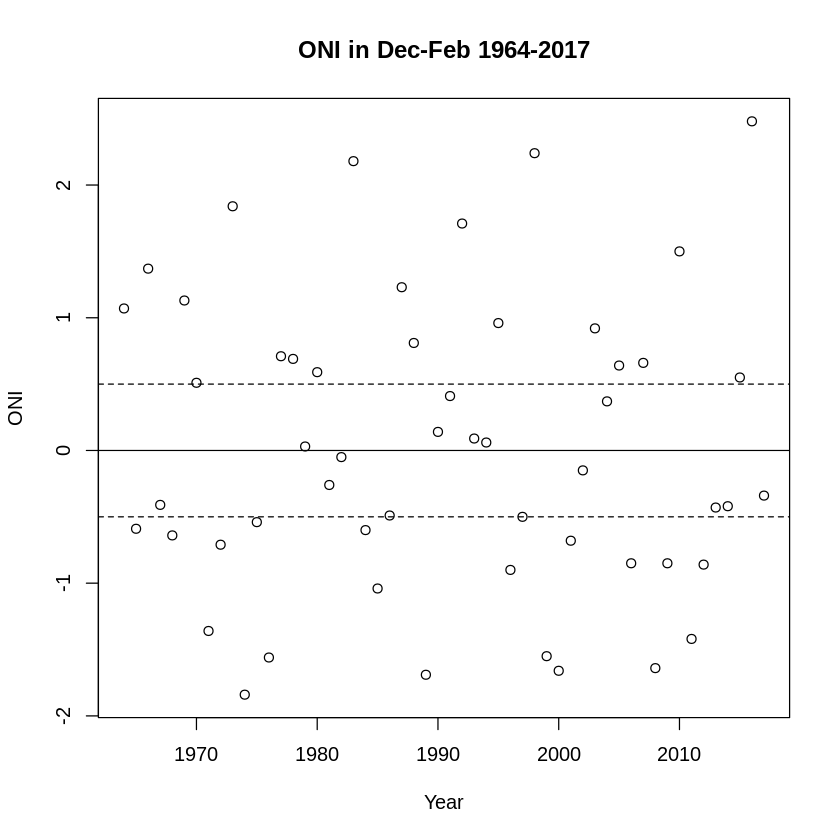

In [ ]:
plot(oni.fig1.ts, type = "p", xlab = "Year", ylab = "ONI", main = "ONI in Dec-Feb 1964-2017")
abline(h=0)
abline(h=.5, lty='dashed')
abline(h=-.5, lty='dashed')

#### Multi-variate ENSO Index (MEI)
I download the MEI data as an HTML file. This file contains years 1950-2018.

In [ ]:
# Define the URL, scrub the file name, and download it to /tmp
mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

In [ ]:
# Read the column names from the data
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

In [ ]:
# Create an empty dataframe
n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 
str(mei.df)

'data.frame':	0 obs. of  13 variables:
 $ YEAR  : logi 
 $ DECJAN: logi 
 $ JANFEB: logi 
 $ FEBMAR: logi 
 $ MARAPR: logi 
 $ APRMAY: logi 
 $ MAYJUN: logi 
 $ JUNJUL: logi 
 $ JULAUG: logi 
 $ AUGSEP: logi 
 $ SEPOCT: logi 
 $ OCTNOV: logi 
 $ NOVDEC: logi 


In [ ]:
# Get all the data lines
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

Convert this into a dataframe.
The first column contains the year and the following columns contains the two-month average for each month of the year.

In [ ]:
# Slice the dataframe for all rows and not the first column
mei.df[1:10, 2:n.cols]

,DECJAN,JANFEB,FEBMAR,MARAPR,APRMAY,MAYJUN,JUNJUL,JULAUG,AUGSEP,SEPOCT,OCTNOV,NOVDEC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.030,-1.133,-1.283,-1.071,-1.434,-1.412,-1.269,-1.042,-0.631,-0.441,-1.151,-1.235
2,-1.049,-1.152,-1.178,-0.511,-0.374,0.288,0.679,0.818,0.726,0.720,0.694,0.504
3,0.433,0.138,0.071,0.224,-0.307,-0.756,-0.305,-0.374,0.310,0.265,-0.351,-0.098
4,0.044,0.401,0.277,0.687,0.756,0.191,0.382,0.209,0.483,0.087,0.078,0.351
5,-0.036,-0.027,0.154,-0.616,-1.465,-1.558,-1.355,-1.456,-1.159,-1.335,-1.124,-1.088
6,-0.740,-0.669,-1.117,-1.621,-1.653,-2.247,-1.976,-2.050,-1.829,-1.738,-1.821,-1.846
7,-1.408,-1.275,-1.371,-1.216,-1.304,-1.523,-1.244,-1.118,-1.350,-1.478,-1.024,-0.993
8,-0.915,-0.348,0.108,0.383,0.813,0.730,0.926,1.132,1.117,1.068,1.138,1.268
9,1.473,1.454,1.313,0.991,0.673,0.812,0.700,0.421,0.171,0.203,0.476,0.691


Modify so that each row in this dataframe contains the data associated with each year.

In [ ]:
# Check that it works on the first ten rows
as.vector(t(mei.df[1:10, 2:n.cols]))

[1] -1.030 -1.133 -1.283 -1.071 -1.434 -1.412 -1.269 -1.042 -0.631 -0.441
 [11] -1.151 -1.235 -1.049 -1.152 -1.178 -0.511 -0.374  0.288  0.679  0.818
 [21]  0.726  0.720  0.694  0.504  0.433  0.138  0.071  0.224 -0.307 -0.756
 [31] -0.305 -0.374  0.310  0.265 -0.351 -0.098  0.044  0.401  0.277  0.687
 [41]  0.756  0.191  0.382  0.209  0.483  0.087  0.078  0.351 -0.036 -0.027
 [51]  0.154 -0.616 -1.465 -1.558 -1.355 -1.456 -1.159 -1.335 -1.124 -1.088
 [61] -0.740 -0.669 -1.117 -1.621 -1.653 -2.247 -1.976 -2.050 -1.829 -1.738
 [71] -1.821 -1.846 -1.408 -1.275 -1.371 -1.216 -1.304 -1.523 -1.244 -1.118
 [81] -1.350 -1.478 -1.024 -0.993 -0.915 -0.348  0.108  0.383  0.813  0.730
 [91]  0.926  1.132  1.117  1.068  1.138  1.268  1.473  1.454  1.313  0.991
[101]  0.673  0.812  0.700  0.421  0.171  0.203  0.476  0.691  0.553  0.810
[111]  0.502  0.202 -0.025 -0.062 -0.112  0.111  0.092 -0.071 -0.170 -0.247

Subset the data frame so it only includes the years of interest (1964-2017).

In [ ]:
mei.df = mei.df[!mei.df$YEAR > 2017,]  
mei.df = mei.df[!mei.df$YEAR < 1964,]

Lam et al. (2019) chose to use the MEI datapoint from the December and January average to represent ENSO intensity in the years following December periods because El Ni&ntilde;o events "tend to become apparent at the tail-end of calendar years." I will also use the the MEI from this two-month period for my analysis of El Ni&ntilde;o events. 

Below, I subset the data so it only contains points for this period.

In [ ]:
mei.fig1 <- subset(mei.df, select=c("DECJAN"))

In the same way I did for ONI, I created a dataset for MEI for each level of intensity (very strong, strong, moderate, and weak) because I originally intended to investigate each level of intensity individually. In these datasets, the MEI values that do not fall within the range for the respective intensity are set to equal zero so it is possible to see only the events corresponding to the respective intensity. However, upon examining the realizations for El Ni&ntilde;o events at each intensity level, I realized it made more sense to combine them because each realization contained only 2-3 observations. I then applied the same methodology of setting other values to zero to create a dataset with very strong and strong intensities and a dataset with moderate and weak intensities. I also created a dataset for all El Ni&ntilde;o events, as defined by MEI > 5 °C, where all values less than .5 are set to zero. 


In [ ]:
mei.vstrong <- mei.fig1
mei.vstrong[mei.vstrong$DECJAN < 2,] <- 0
mei.strong <- mei.fig1
mei.strong[mei.strong$DECJAN > 1.9,] <- 0
mei.strong[mei.strong$DECJAN < 1.5,] <- 0
mei.moderate <- mei.fig1
mei.moderate[mei.moderate$DECJAN > 1.4,] <- 0
mei.moderate[mei.moderate$DECJAN < 1.0,] <- 0
mei.weak <- mei.fig1
mei.weak[mei.weak$DECJAN > .9,] <- 0
mei.weak[mei.weak$DECJAN < .5,] <- 0
mei.svs <- mei.fig1
mei.svs[mei.svs$DECJAN < 1.5,] <- 0
mei.wm <- mei.fig1
mei.wm[mei.wm$DECJAN < .5,] <- 0
mei.wm[mei.wm$DECJAN > 1.4,] <- 0
mei.elnino <- mei.fig1
mei.elnino[mei.elnino$DECJAN < .5,] <- 0

Create time series objects.

In [ ]:
mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start=c(1964, 1), frequency=12)
mei.fig1.ts <- ts(mei.fig1, start=c(1964, 1), frequency = 1)
mei.vstrong.ts <- ts(mei.vstrong, start=c(1964,1))
mei.strong.ts <- ts(mei.strong, start=c(1964,1))
mei.moderate.ts <- ts(mei.moderate, start=c(1964,1))
mei.weak.ts <- ts(mei.weak, start=c(1964,1))
mei.svs.ts <- ts(mei.svs, start=c(1964,1))
mei.wm.ts <- ts(mei.wm, start=c(1964,1))
mei.elnino.ts <- ts(mei.elnino, start=c(1964,1))

Below, I plotted the realization of the time series of MEI during the chosen season (Dec-Jan) for the time period (1964-2017).

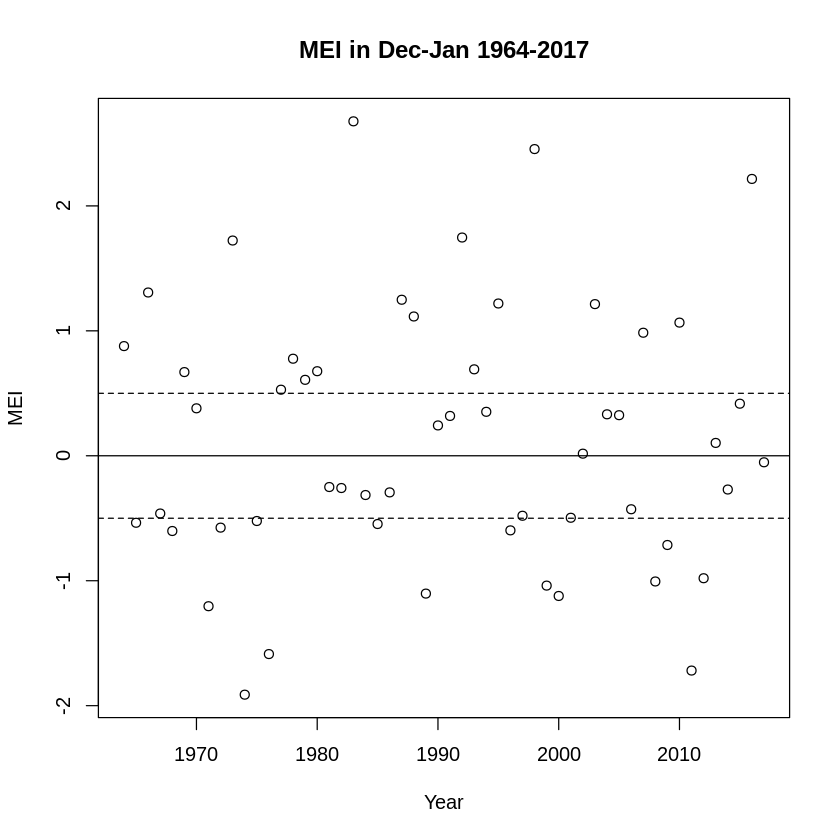

In [ ]:
plot(mei.fig1.ts, type="p", xlab = "Year", ylab = "MEI", main = "MEI in Dec-Jan 1964-2017")
abline(h=0)
abline(h=.5, lty='dashed')
abline(h=-.5, lty='dashed')

#### EMDAT Data

I downloaded EMDAT data for all regions for years 1964-2017 and all disaster types except technological, complex, extra-terrestrial (natural), and geophysical (natural). There were 12239 records in this file, which I downloaded as an Excel sheet (.xlsx). I deleted the first six rows, which were not part of the dataset; the seventh row contained the column headers and the following rows contained the data. I saved the modified file as a csv and uploaded it to my github. I have imported it using the link from my github.

In [ ]:
pad.file <- "https://raw.githubusercontent.com/jpdas18/hello-world/main/EMDAT.csv"
pad.df.all <- read.csv(pad.file, header=TRUE)

These are the columns in the data frame I just read in.

In [ ]:
colnames(pad.df.all)

[1] "Dis.No"                          "Year"                           
 [3] "Seq"                             "Disaster.Group"                 
 [5] "Disaster.Subgroup"               "Disaster.Type"                  
 [7] "Disaster.Subtype"                "Disaster.Subsubtype"            
 [9] "Event.Name"                      "Entry.Criteria"                 
[11] "Country"                         "ISO"                            
[13] "Region"                          "Continent"                      
[15] "Location"                        "Origin"                         
[17] "Associated.Dis"                  "Associated.Dis2"                
[19] "OFDA.Response"                   "Appeal"                         
[21] "Declaration"                     "Aid.Contribution"               
[23] "Dis.Mag.Value"                   "Dis.Mag.Scale"                  
[25] "Latitude"                        "Longitude"                      
[27] "Local.Time"                      "River.Basin"                    
[29] "Start.Year"                      "Start.Month"                    
[31] "Start.Day"                       "End.Year"                       
[33] "End.Month"                       "End.Day"                        
[35] "Total.Deaths"                    "No.Injured"                     
[37] "No.Affected"                     "No.Homeless"                    
[39] "Total.Affected"                  "Reconstruction.Costs...000.US.."
[41] "Insured.Damages...000.US.."      "Total.Damages...000.US.."       
[43] "CPI"

For the purposes of this lab, I only need location information, time frame information, and the total number of people affected. I can use this information, in tandem with population data, to calculate PAD rates. PAD rates are rates of people affected by disaster per 1000 people; I will later analyze PAD rates as a time series to investigate associations with ENSO. 

Below, I subset the PAD data frame to only include the columns of interest.

In [ ]:
cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Affected")
pad.df <- pad.df.all[cols.interest]

#### Population totals for countries

The population totals for each country were found through The World Bank. 

In [ ]:
wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/tmp/", wbank.name, sep="")
download.file(wbank.url, wbank.file)

In [ ]:
unzip(zipfile = wbank.file, exdir = "/tmp")

In [ ]:
my.file <- ""
for (tmp.file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp.file)
  if (length(a) > 0) {
    my.file <- tmp.file
  }
}
print(my.file)

[1] "API_SP.POP.TOTL_DS2_en_csv_v2_2106202.csv"


In [ ]:
# Add the path back to the file name
wb.file <- paste("/tmp/", my.file, sep="")

In [ ]:
wb.df <- read.csv(wb.file, header = TRUE, skip = 4)

#### Combining country population data with disaster data

The code loops through each row in the data fram and matches each country and year to the corresponding population. If there is no data, an NA value is entered.

In [ ]:
for (i in 1:nrow(pad.df)) {
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  # Match returns "NA" if no match
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    pad.df[i, 'population'] = tmp.pop
  } else {
    pad.df[i, 'population'] = NA
  }
}

#### Generating annual PAD rates

I subset the PAD dataframe for the years of interest (1964-2017). 

In [ ]:
pad.df = pad.df[!pad.df$Start.Year > 2017,] 
pad.df = pad.df[!pad.df$Start.Year < 1964,]

I install the tidyr package, which helps in my next step: dropping records where the Total Affected is NA.

In [ ]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("tidyr")

I drop records from the dataframe where the value in the Total Affected column is NA. Dropping them ensures that the country populations associated with these records are not counted in the sum of populations for each year.

In [ ]:
pad.df <- pad.df %>% drop_na(Total.Affected)

I create a vector that contains all the years in the study time period. I then put this into a dataframe which I then add sum the number of total affected people and population for each year to. I go through my original pad data frame and calculate the sum of the total affected people for each year. I then go through my original pad data frame and calculate the sum of all the populations of the countries with people affected by disasters each year. 

In [ ]:
years <- c(1964:2017)
annual_padrate <- data.frame(years)
for (j in 1:length(years)){
my.pad <- subset(pad.df, Start.Year == years[j])
pad <- 0
for (i in 1:nrow(my.pad)){
  if (!is.na(my.pad$Total.Affected[i]) & !is.na(my.pad$population[i])){
    my.ta <- my.pad$Total.Affected[i]
    pad <- pad + my.ta
  }
}
annual_padrate[j, 'Total.Affected'] <- pad
pop <- 0
for (my.iso in unique(my.pad$ISO)){
  a <- match(my.iso, my.pad$ISO)
  tmp.pop <- my.pad$population[a]
  if (!is.na(tmp.pop)){
    pop <- pop + tmp.pop
  }
}
annual_padrate[j, 'Total.Population'] <- pop
  }


In my new annual_padrate dataframe, I create a column for PAD Rate per 1000; this column value equals the value of the annual total affected divided by the annual population total multiplied by 1000.

In [ ]:
annual_padrate[['PAD.Rate']] = annual_padrate$Total.Affected/annual_padrate$Total.Population*1000

Create a time series object.

In [ ]:
padrate.ts <- ts(annual_padrate$PAD.Rate, start = c(1964,1), frequency = 1)

Below, I plotted the realization of the time series of annual PAD rates per 1000 people for the given time period (1964-2017).

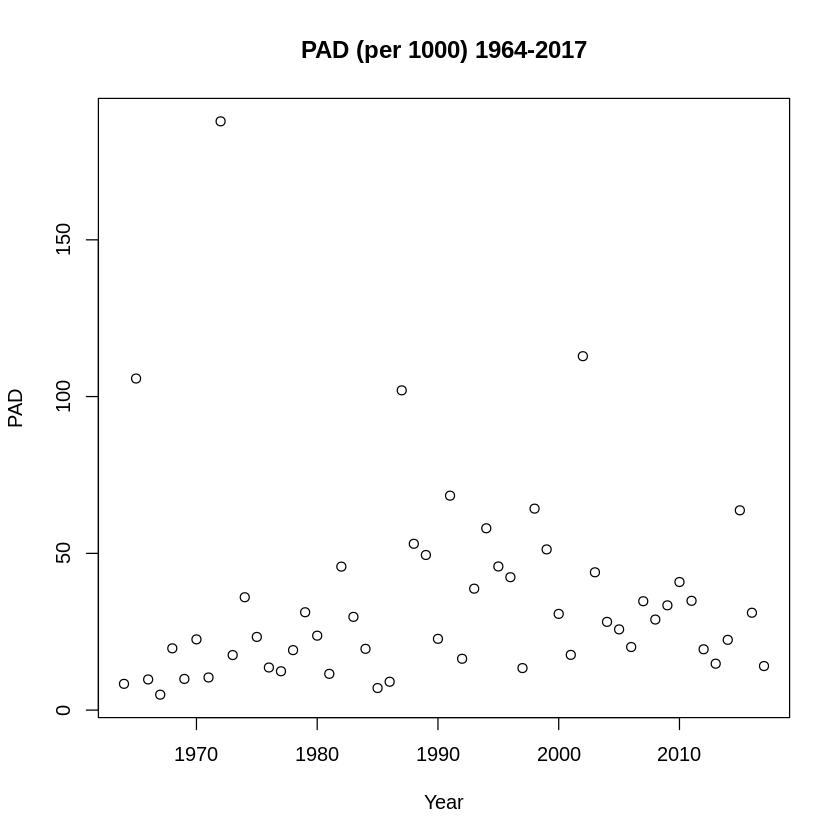

In [ ]:
plot(padrate.ts, type = 'p', xlab = "Year", ylab = "PAD", main = "PAD (per 1000) 1964-2017")

#### LA Rainfall Data


I inputted rainfall data into an Excel sheet which I saved as a .csv file and uploaded to my GitHub. I read it into Colab here. It is important to make note that I recorded each season by its start year for simplicity.

In [1]:
rainfall.file <- "https://raw.githubusercontent.com/jpdas18/hello-world/main/LA_rainfall.csv"
rainfall.df <- read.csv(rainfall.file, header=TRUE)

The dataframe only contains rainfall information in inches for the years 1964-2017, so it is ready to be put into a time series.

In [2]:
rainfall.ts <- ts(rainfall.df$Rainfall, start=c(1964,1), frequency=1)

Below, I plotted the realization of the time series of seasonal rainfall for the time period (1964-2017).

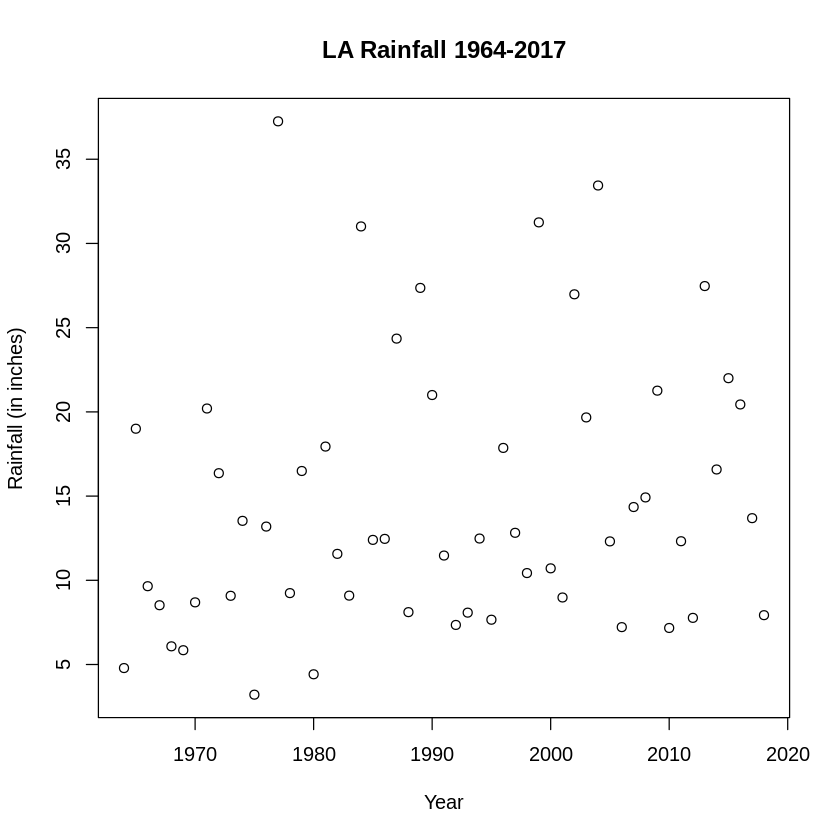

In [3]:
plot(rainfall.ts, type = "p", xlab = "Year", ylab = "Rainfall (in inches)", main = "LA Rainfall 1964-2017")

# Results
##### Now that I have processed my data into time series, I will investigate it using some of the tools I learned in class (periodogram and sample autocorrelation function). 

First, I will plot the realizations for ONI, MEI, and PAD rates from the years 1964-2017, recreating Figure 1 from Lam et al. (2019). Because El Nino events "tend to become apparent at the tail-end of calendar years", the ONI data is for December, January, and February for each year subsequent to the corresponding December, and the MEI data is for December and January for each year subsequent to the corresponding December (Lam et al. 2019).  

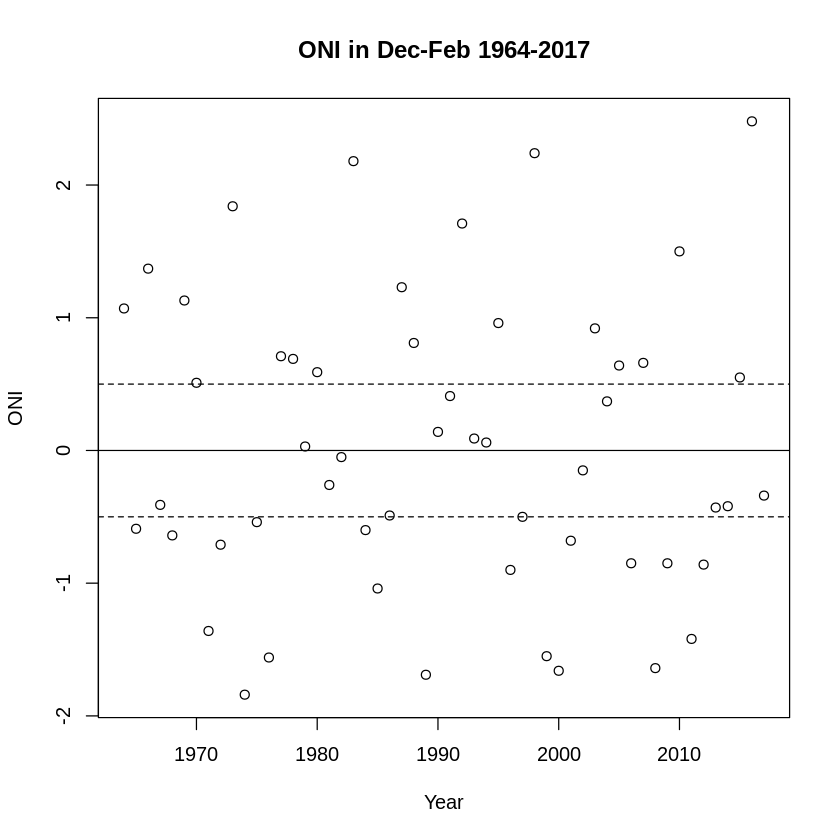

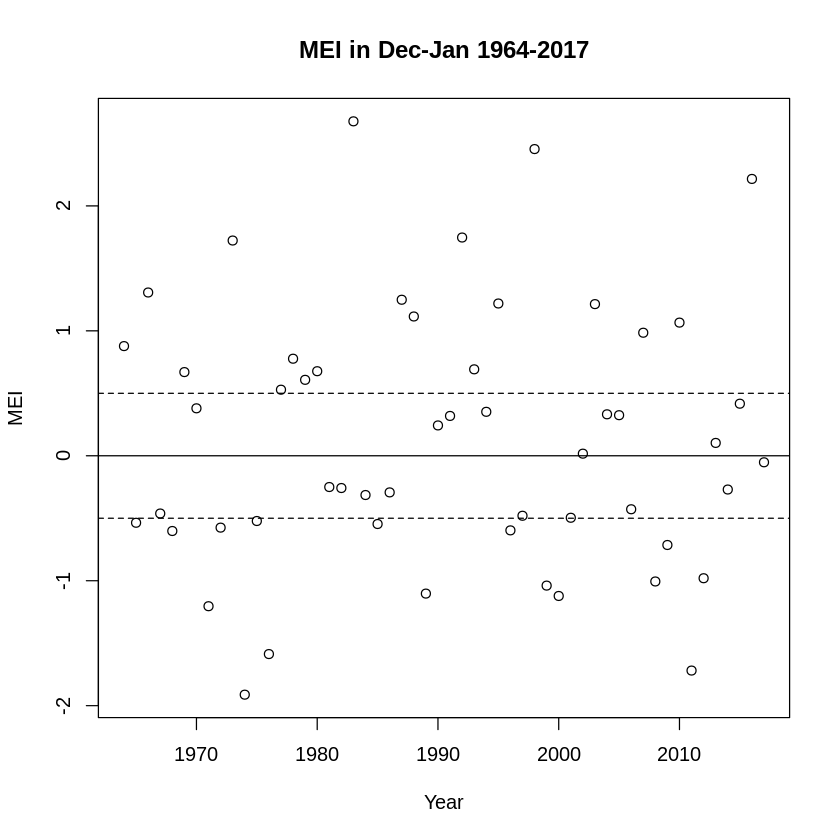

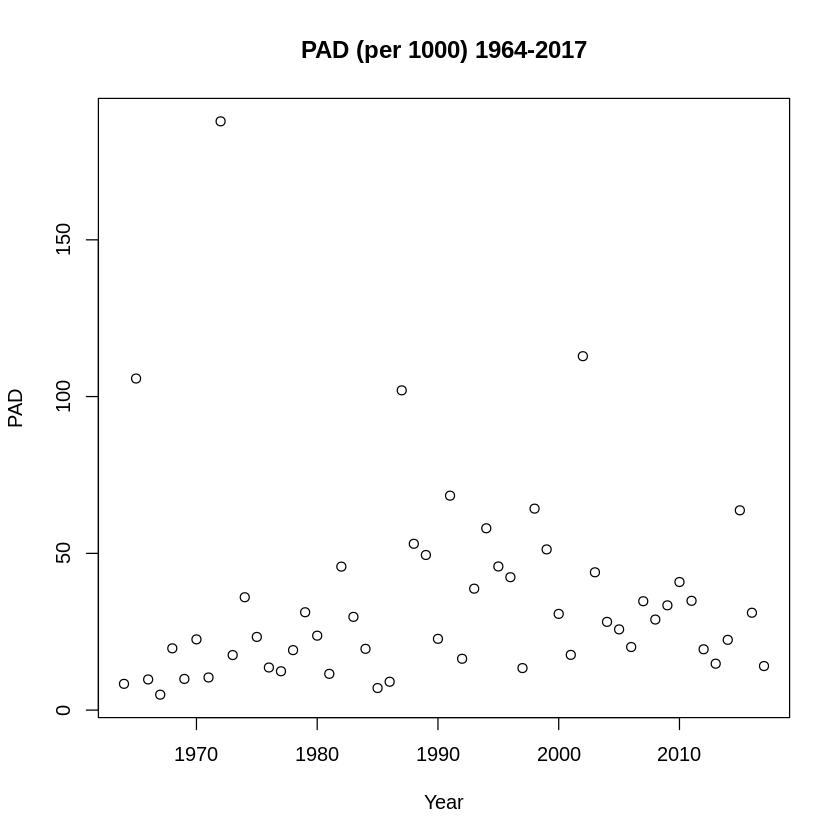

In [ ]:
plot(oni.fig1.ts, type = "p", xlab = "Year", ylab = "ONI", main = "ONI in Dec-Feb 1964-2017")
abline(h=0)
abline(h=.5, lty='dashed')
abline(h=-.5, lty='dashed')
plot(mei.fig1.ts, type="p", xlab = "Year", ylab = "MEI", main = "MEI in Dec-Jan 1964-2017")
abline(h=0)
abline(h=.5, lty='dashed')
abline(h=-.5, lty='dashed')
plot(padrate.ts, type = 'p', xlab = "Year", ylab = "PAD", main = "PAD (per 1000) 1964-2017")

I will first investigate the ONI data. I will use the full dataset for all anomalies in the years 1964-2017 as well as the three other datasets I created based on metrics for ENSO intensity used by Lam et al. (2019).

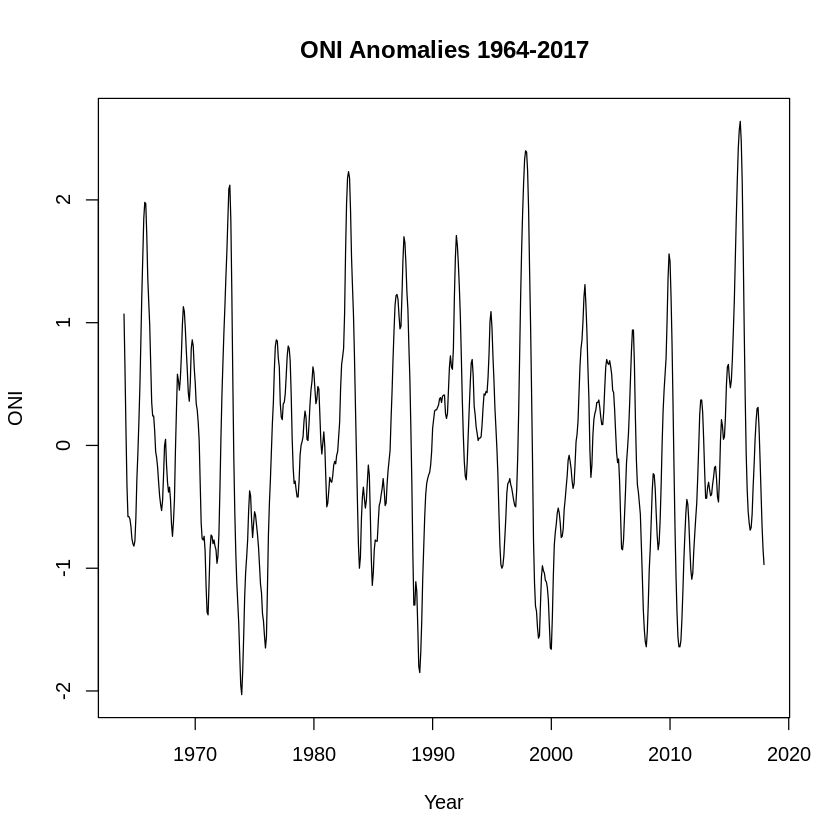

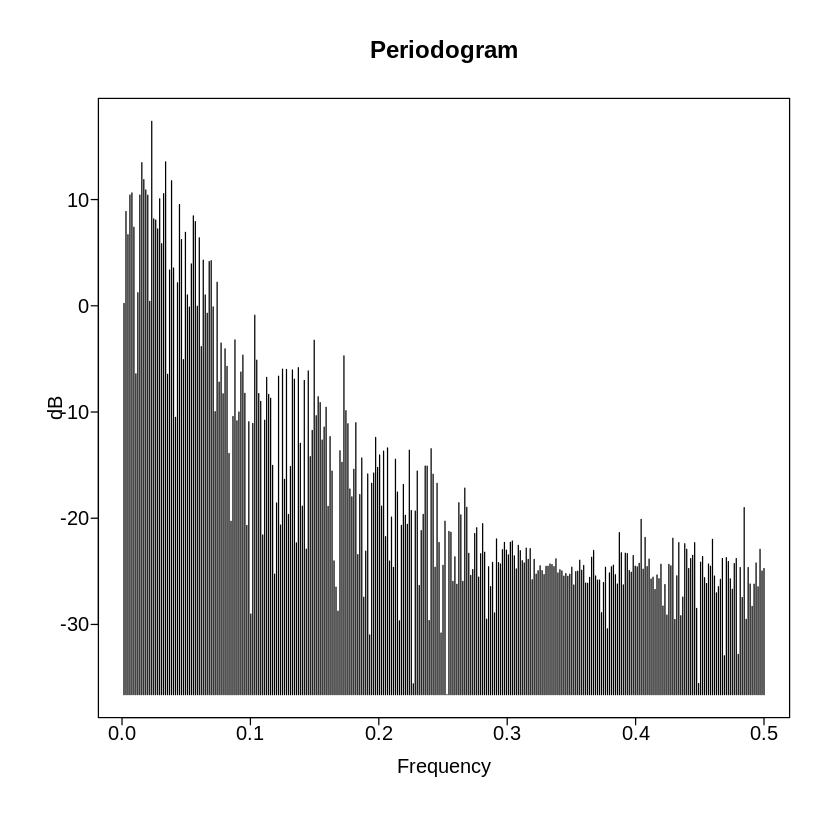

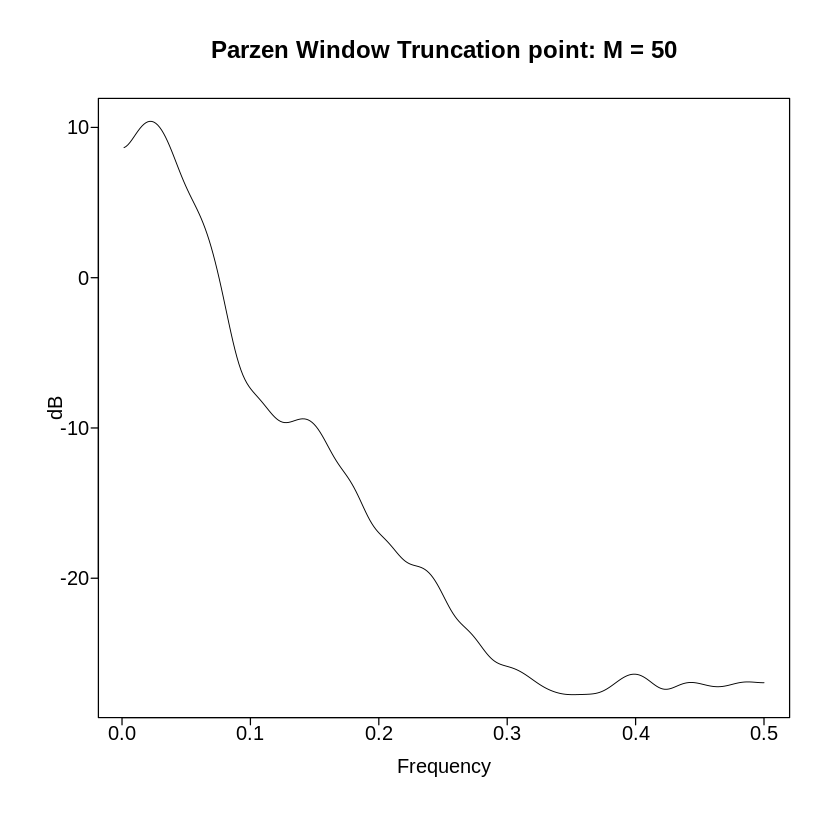

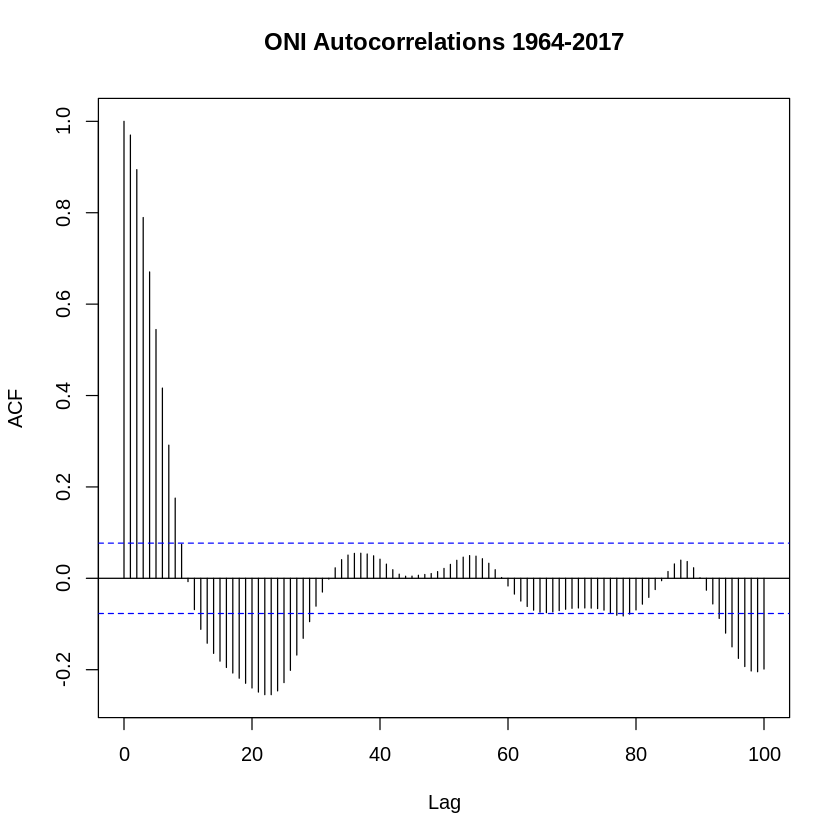

In [ ]:
plot(oni.ts, type = "l", xlab = "Year", ylab = "ONI", main = "ONI Anomalies 1964-2017")
oni.p <- period.wge(oni.ts, dbcalc=TRUE, plot=TRUE)
oni.parz <- parzen.wge(oni.ts)
oni.acf <- acf(oni.df$ANOM, lag.max=100, main = "ONI Autocorrelations 1964-2017")

In [ ]:
x <- which.max(oni.p$pgram)
y <- oni.p$freq[x]
cat("The dominant frequency equals", y, "\n")
cat("The corresponding period equals", 1/y, "months", "\n")
x2 <- which.max(oni.p$pgram[0:14])
y2 <- oni.p$freq[x2]
cat("The second most dominant frequency equals", y2, "\n")
cat("The corresponding period equals", 1/y2, "months")

The dominant frequency equals 0.02314815 
The corresponding period equals 43.2 months 
The second most dominant frequency equals 0.0154321 
The corresponding period equals 64.8 months

Below I investigate a time series containing ONI values during the months of December, January, and February greater than .5 during the time period of interest (1964-2017). I chose to look at this seasonal period (Dec-Feb) to follow Lam et al. (2019)'s example. ONI values greater than .5 indicate an El Ni&ntilde;o event, so the following time series serves to identify El Ni&ntilde;o years. 

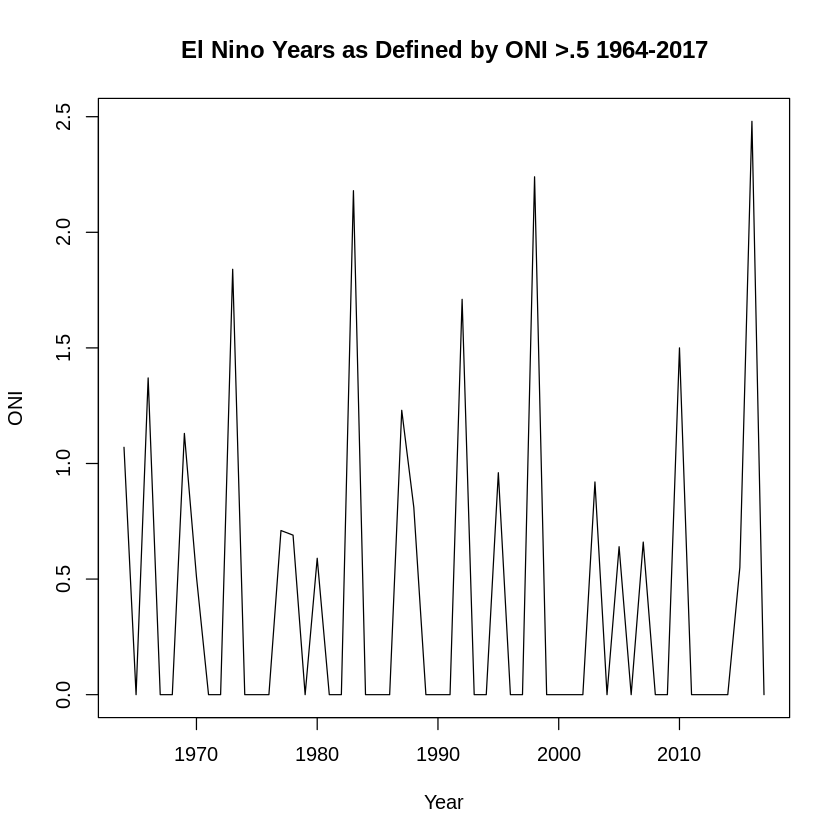

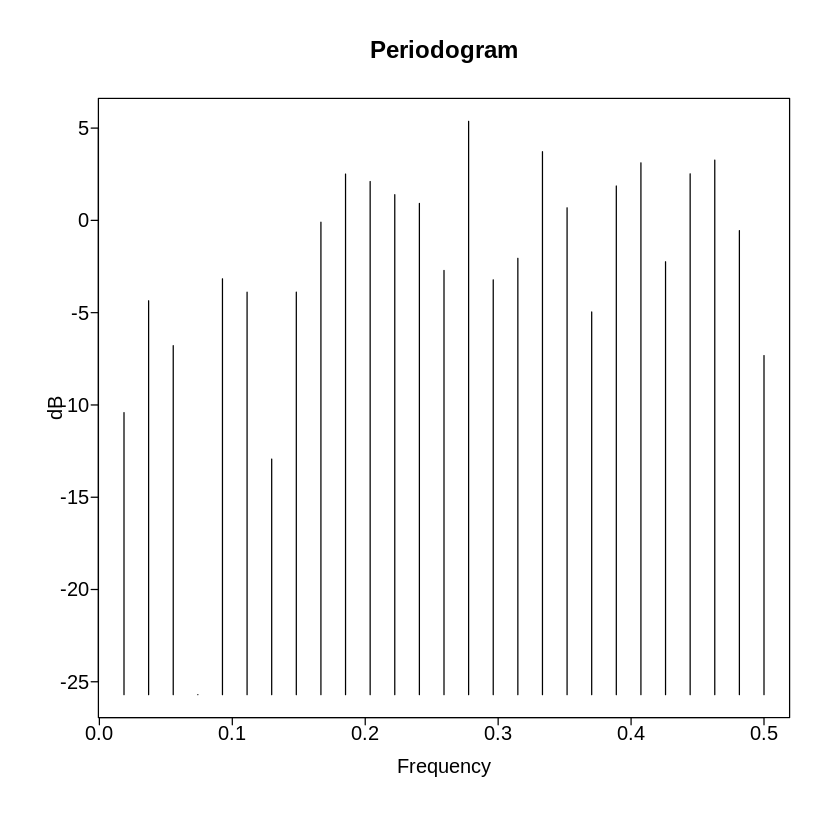

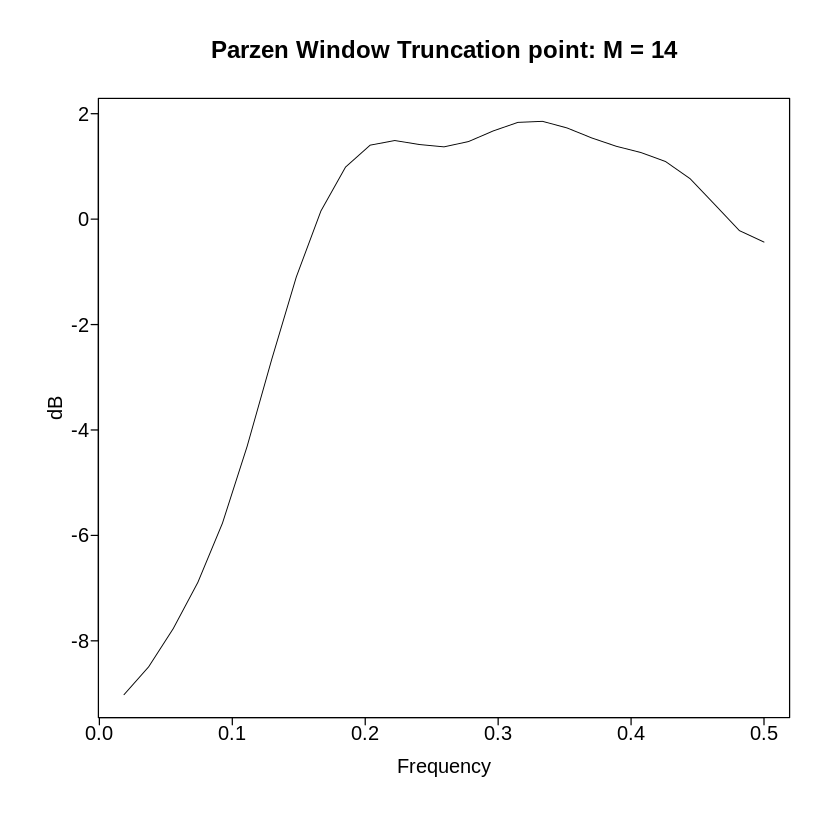

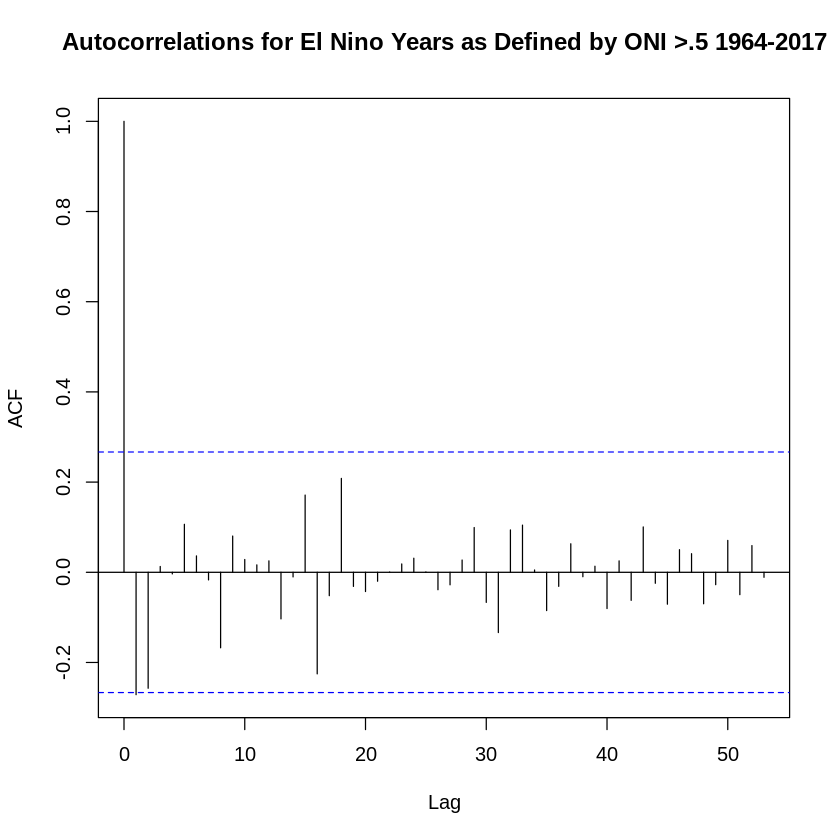

In [ ]:
plot(oni.elnino.ts, xlab = "Year", ylab = "ONI", main = "El Nino Years as Defined by ONI >.5 1964-2017")
oni.p.elnino <- period.wge(oni.elnino.ts, dbcalc=TRUE, plot=TRUE)
oni.parz.elnino <- parzen.wge(oni.elnino.ts)
oni.acf.elnino <- acf(oni.elnino.ts, lag.max=100, main = "Autocorrelations for El Nino Years as Defined by ONI >.5 1964-2017")

In [ ]:
x <- which.max(oni.p.elnino$pgram)
y <- oni.p.elnino$freq[x]
cat("The dominant frequency equals", y, "\n")
cat("The corresponding period equals", 1/y, "years", "\n")
x2 <- which.max(oni.p.elnino$pgram[0:14])
y2 <- oni.p.elnino$freq[x2]
cat("The second most dominant frequency equals", y2, "\n")
cat("The corresponding period equals", 1/y2, "years")

The dominant frequency equals 0.2777778 
The corresponding period equals 3.6 years 
The second most dominant frequency equals 0.1851852 
The corresponding period equals 5.4 years

Below, I conduct a time series analysis of data for when the ONI value in Dec-Feb time frame indicates an El Ni&ntilde;o event at a strong or very strong intensity. 

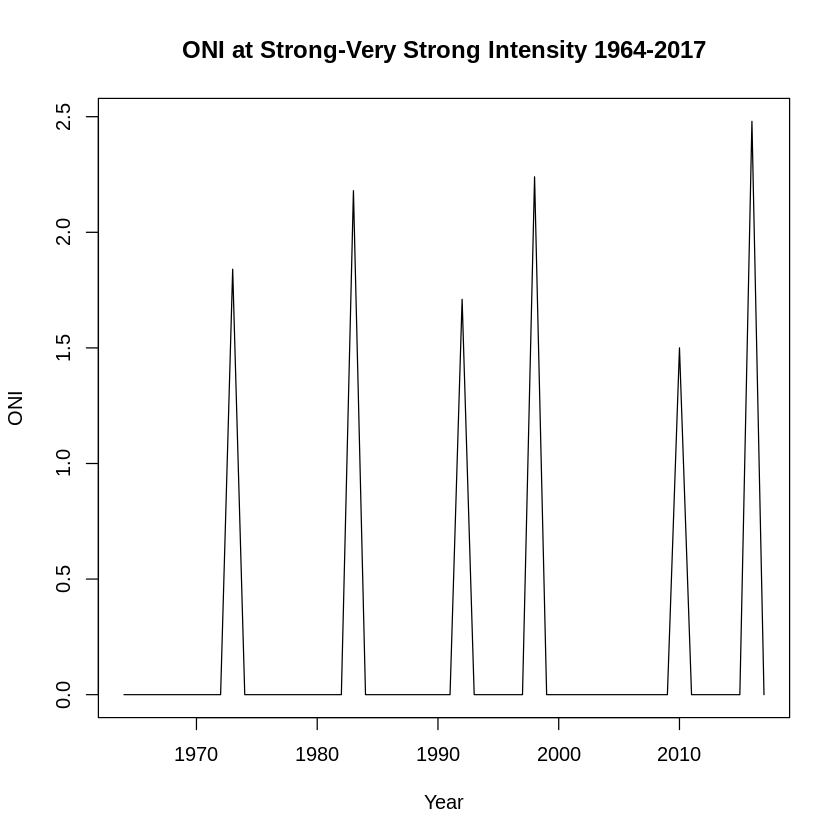

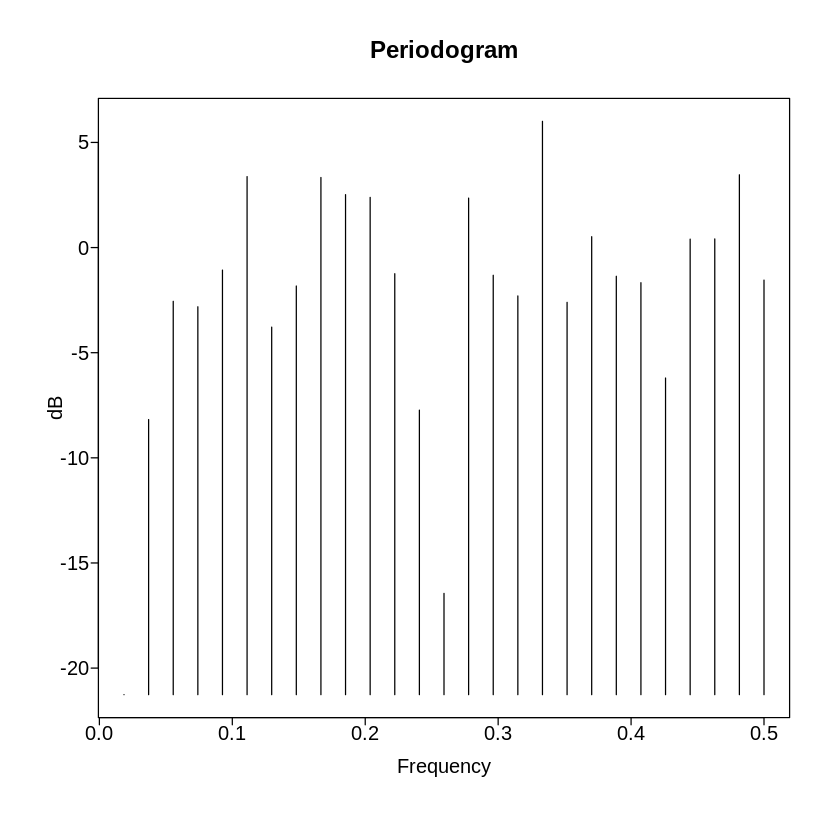

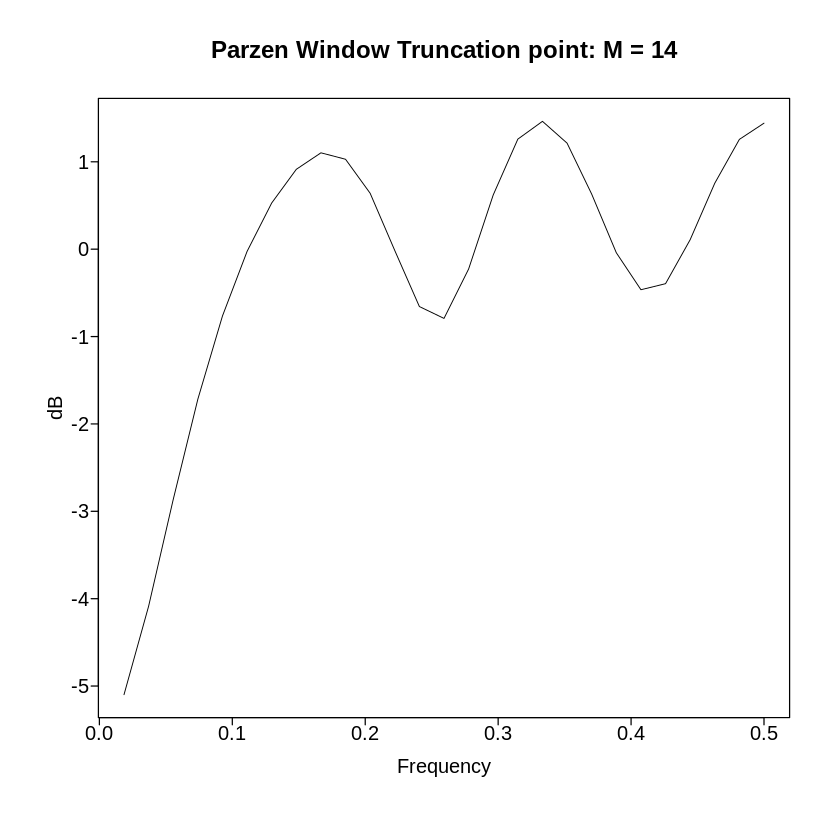

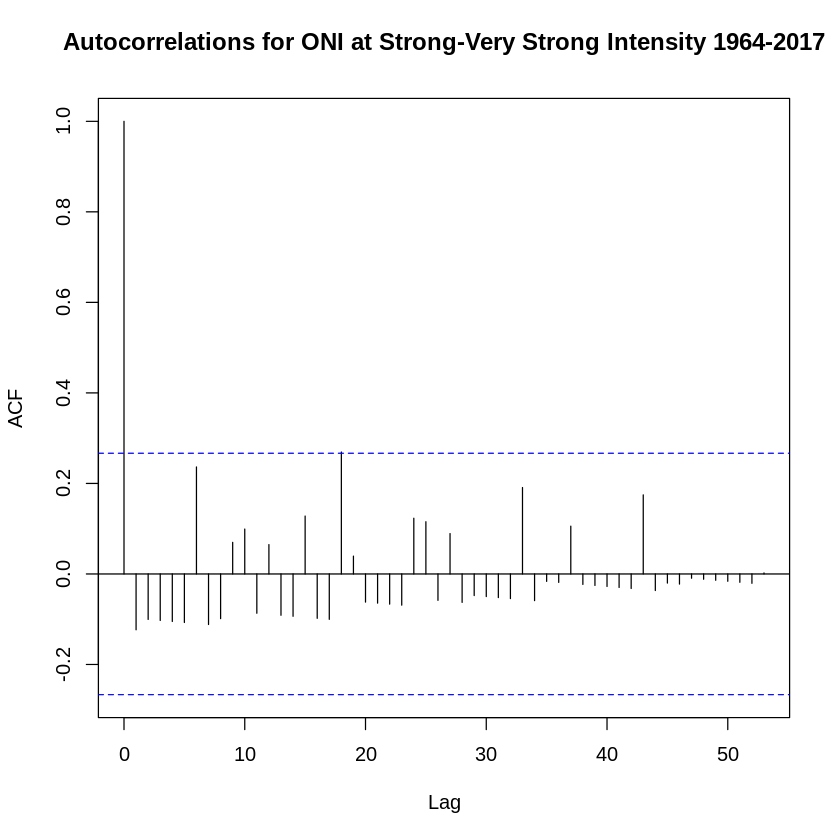

In [ ]:
plot(oni.svs.ts, xlab = "Year", ylab = "ONI", main = "ONI at Strong-Very Strong Intensity 1964-2017")
oni.p.svs <- period.wge(oni.svs.ts, dbcalc=TRUE, plot=TRUE)
oni.parz.svs <- parzen.wge(oni.svs.ts)
oni.acf.svs <- acf(oni.svs.ts, lag.max=100, main = "Autocorrelations for ONI at Strong-Very Strong Intensity 1964-2017")

In [ ]:
x <- which.max(oni.p.svs$pgram)
y <- oni.p.svs$freq[x]
cat("The dominant frequency equals", y, "\n")
cat("The corresponding period equals", 1/y, "years", "\n")
x2 <- which.max(oni.p.svs$pgram[0:17])
y2 <- oni.p.svs$freq[x2]
cat("The second most dominant frequency equals", y2, "\n")
cat("The corresponding period equals", 1/y2, "years")

The dominant frequency equals 0.3333333 
The corresponding period equals 3 years 
The second most dominant frequency equals 0.1111111 
The corresponding period equals 9 years

Below, I conduct a time series analysis of data for when the ONI value in Dec-Feb time frame indicates an El Ni&ntilde;o event at a weak or moderate intensity. 

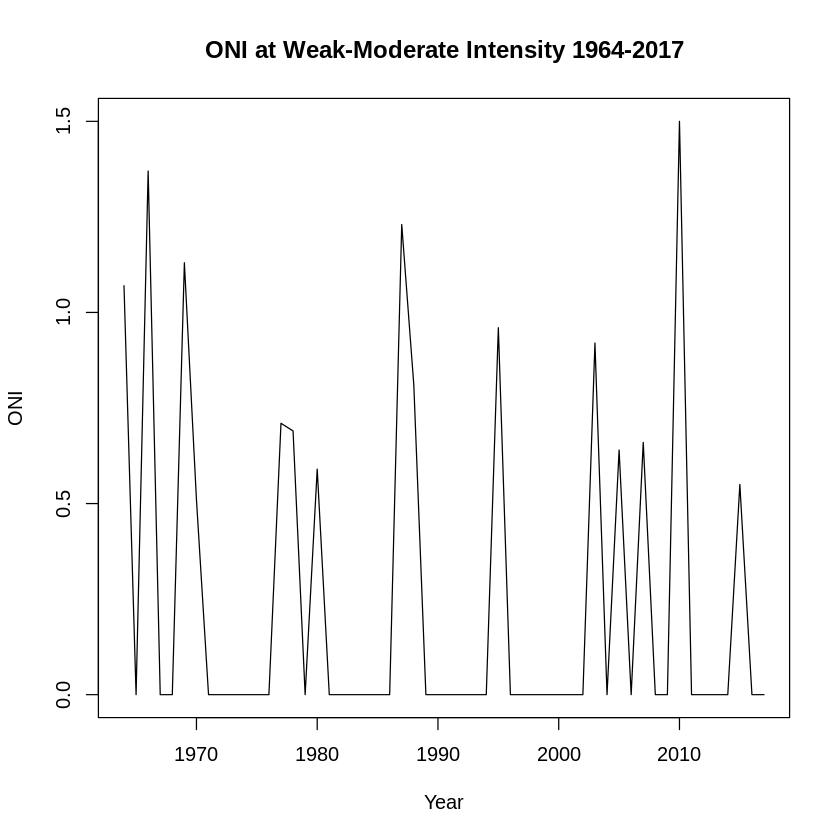

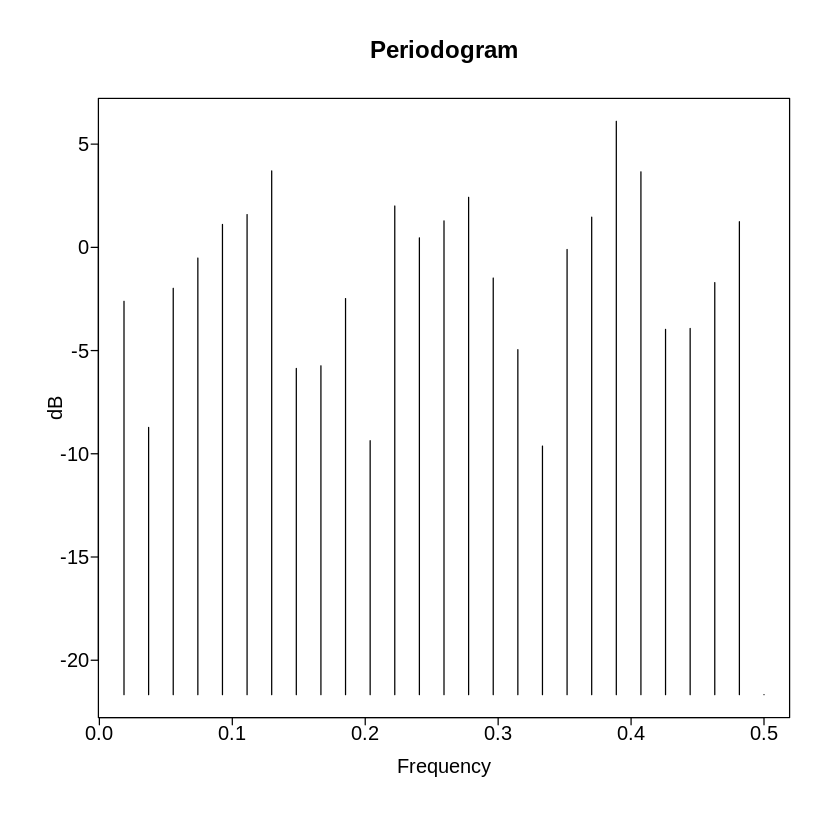

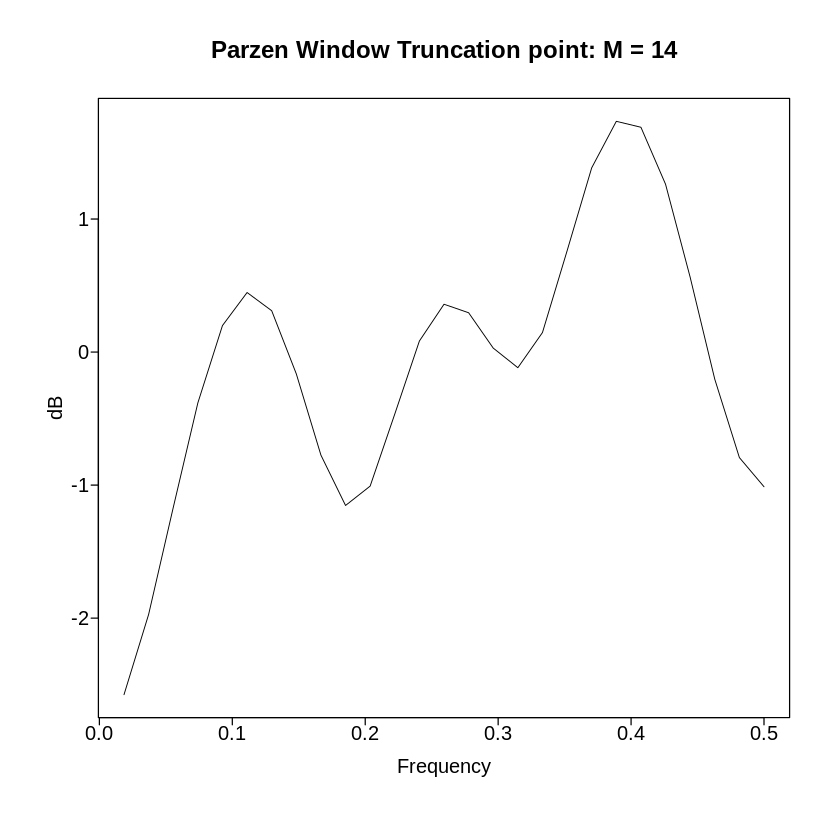

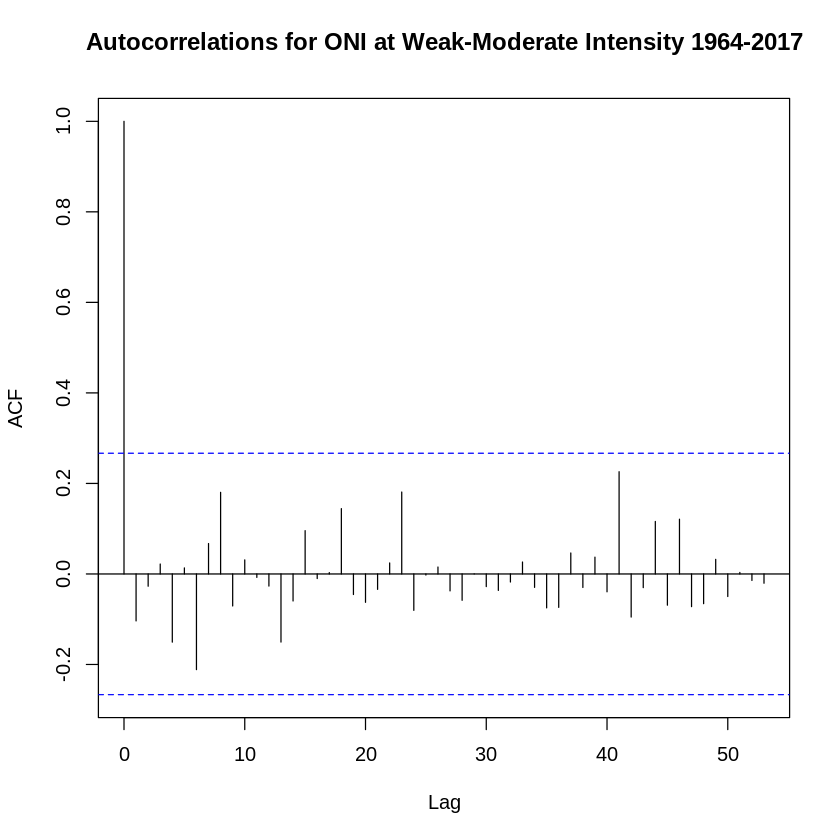

In [ ]:
plot(oni.wm.ts, xlab = "Year", ylab = "ONI", main = "ONI at Weak-Moderate Intensity 1964-2017")
oni.p.wm <- period.wge(oni.wm.ts, dbcalc=TRUE, plot=TRUE)
oni.parz.wm <- parzen.wge(oni.wm.ts)
oni.acf.wm <- acf(oni.wm.ts, lag.max=100, main = "Autocorrelations for ONI at Weak-Moderate Intensity 1964-2017")

In [ ]:
x <- which.max(oni.p.wm$pgram)
y <- oni.p.wm$freq[x]
cat("The dominant frequency equals", y, "\n")
cat("The corresponding period equals", 1/y, "years", "\n")
x2 <- which.max(oni.p.wm$pgram[0:20])
y2 <- oni.p.wm$freq[x2]
cat("The second most dominant frequency equals", y2, "\n")
cat("The corresponding period equals", 1/y2, "years", "\n")
x3 <- which.max(oni.p.wm$pgram[0:6])
y3 <- oni.p.wm$freq[x3]
cat("The third most dominant frequency equals", y3, "\n")
cat("The corresponding period equals", 1/y3, "years")

The dominant frequency equals 0.3888889 
The corresponding period equals 2.571429 years 
The second most dominant frequency equals 0.1296296 
The corresponding period equals 7.714286 years 
The third most dominant frequency equals 0.1111111 
The corresponding period equals 9 years

I will next investigate MEI data. I will first investigate a dataset containing all the MEI data for the study period and then datasets that contain values corresponding to El Ni&ntilde;o events and intensities.

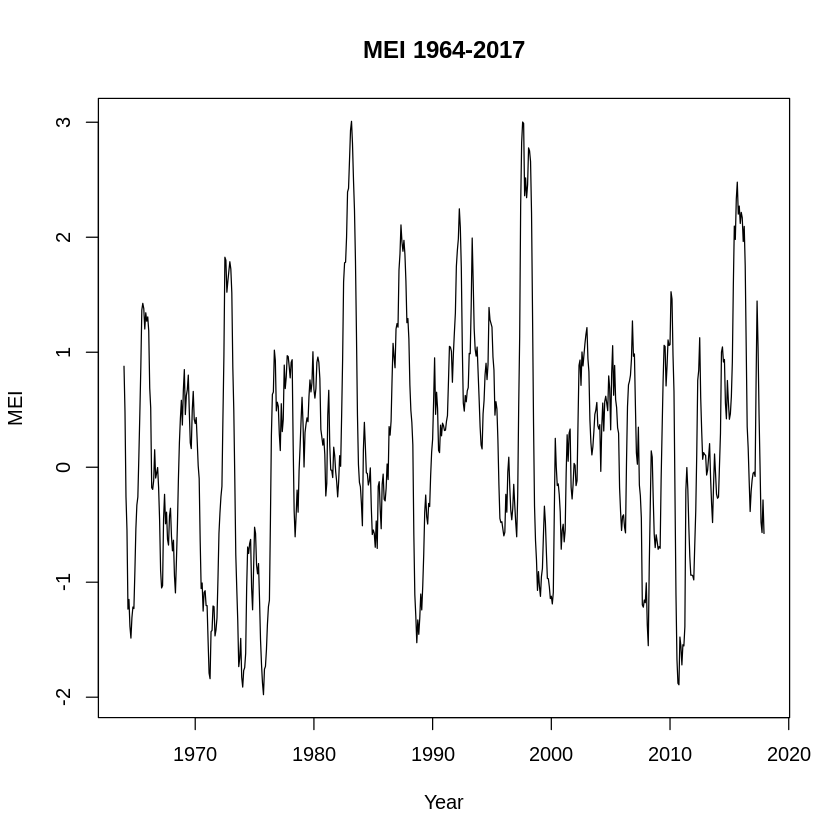

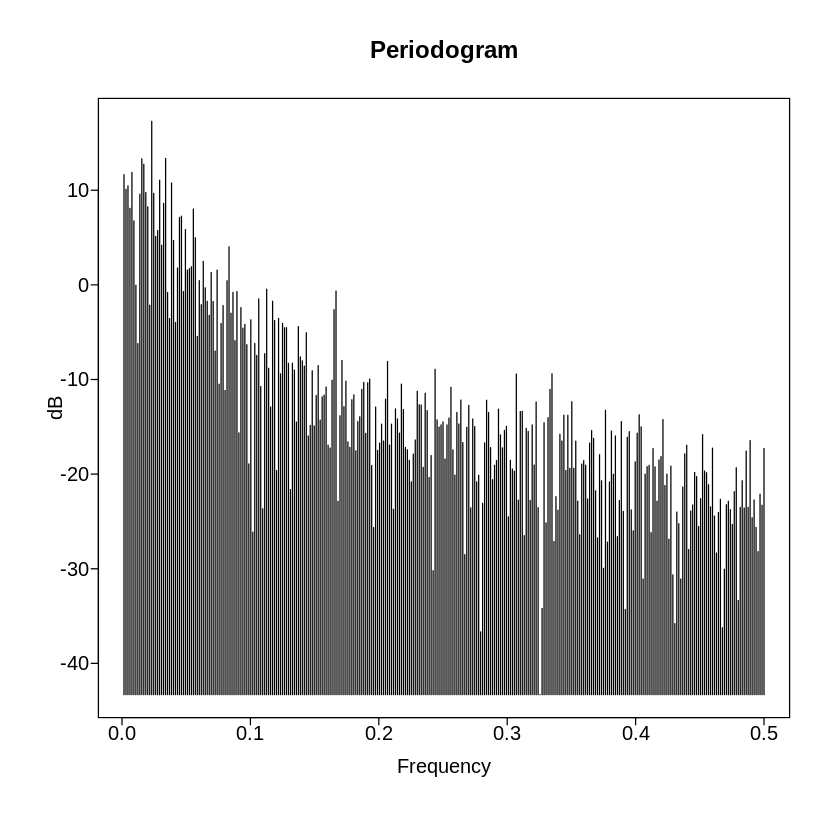

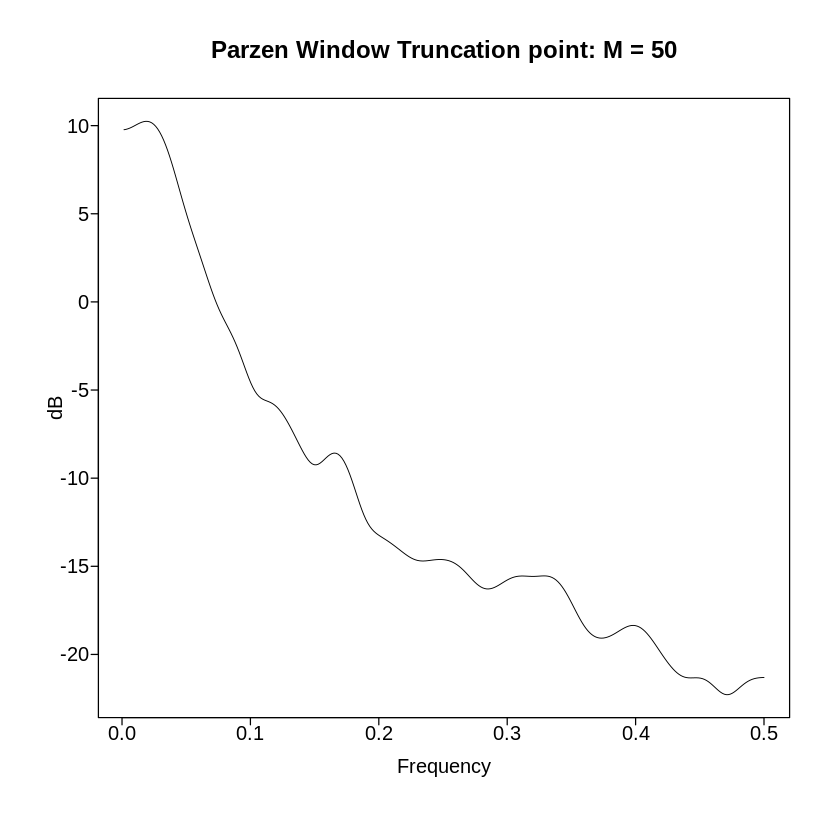

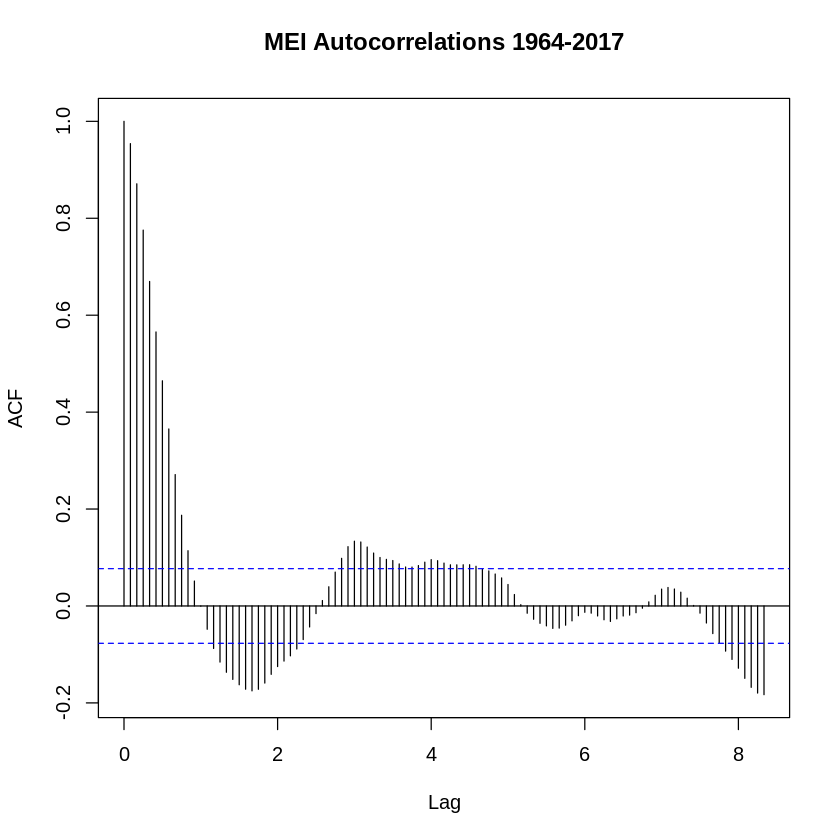

In [ ]:
plot(mei.ts, type = "l", xlab = "Year", ylab = "MEI", main = "MEI 1964-2017")
mei.p <- period.wge(mei.ts, dbcalc=TRUE, plot=TRUE)
mei.parz <- parzen.wge(mei.ts)
mei.acf <- acf(mei.ts, lag.max=100, main = "MEI Autocorrelations 1964-2017")

In [ ]:
x <- which.max(mei.p$pgram)
y <- mei.p$freq[x]
cat("The dominant frequency is", y, "\n")
cat("The corresponding period is", 1/y, "\n")
x2 <- which.max(mei.p$pgram[0:14])
y2 <- mei.p$freq[x2]
cat("The dominant frequency is", y2, "\n")
cat("The corresponding period is", 1/y2, "\n")

The dominant frequency is 0.02314815 
The corresponding period is 43.2 
The dominant frequency is 0.0154321 
The corresponding period is 64.8 


Below I investigate a time series containing MEI values during the months of December and January greater than .5 during the time period of interest (1964-2017). I chose to look at this seasonal period (Dec-Jan) to follow Lam et al. (2019)'s example. MEI values greater than .5 indicate an El Ni&ntilde;o event, so the following time series serves to identify El Ni&ntilde;o years. 

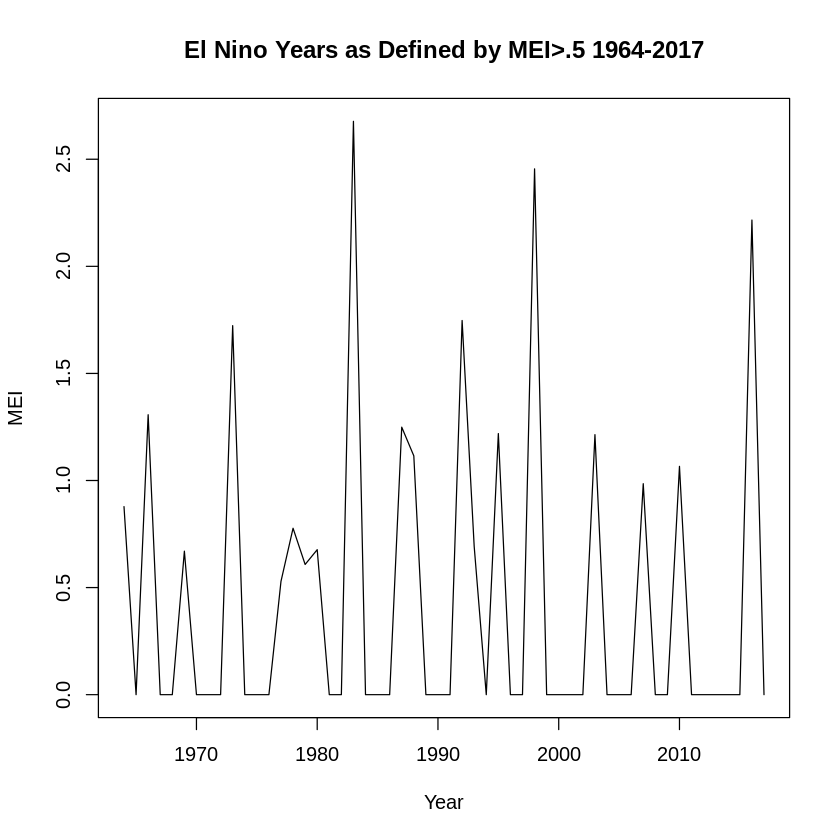

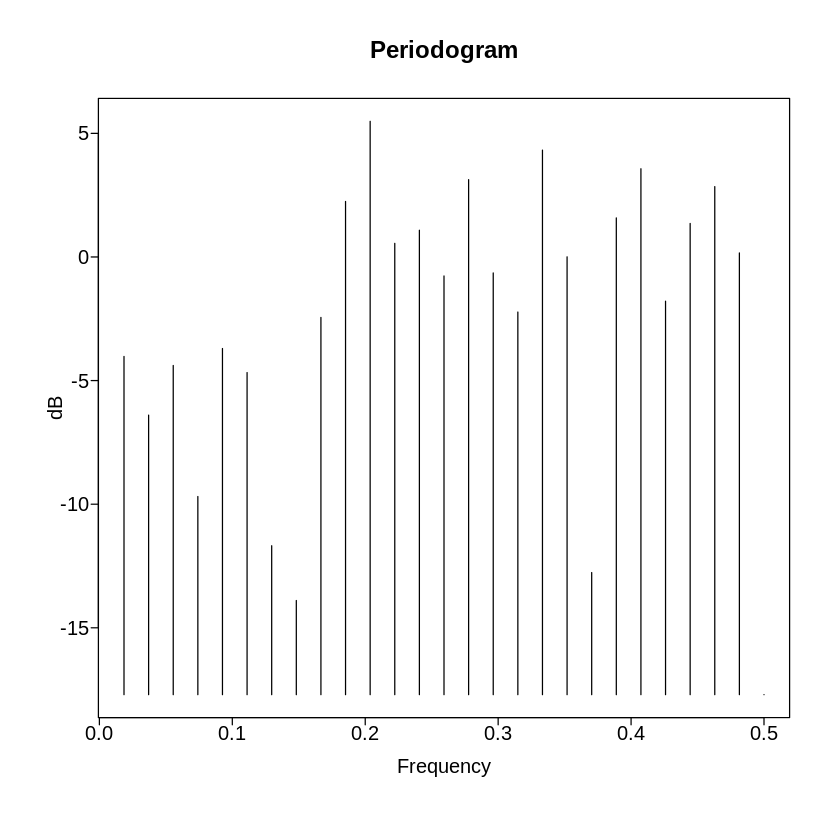

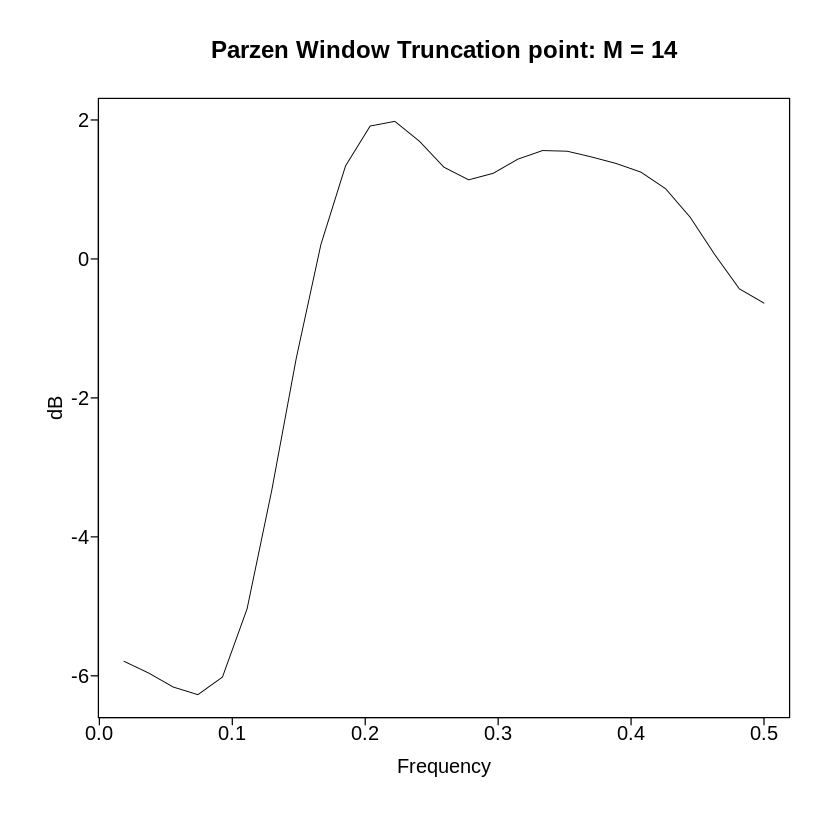

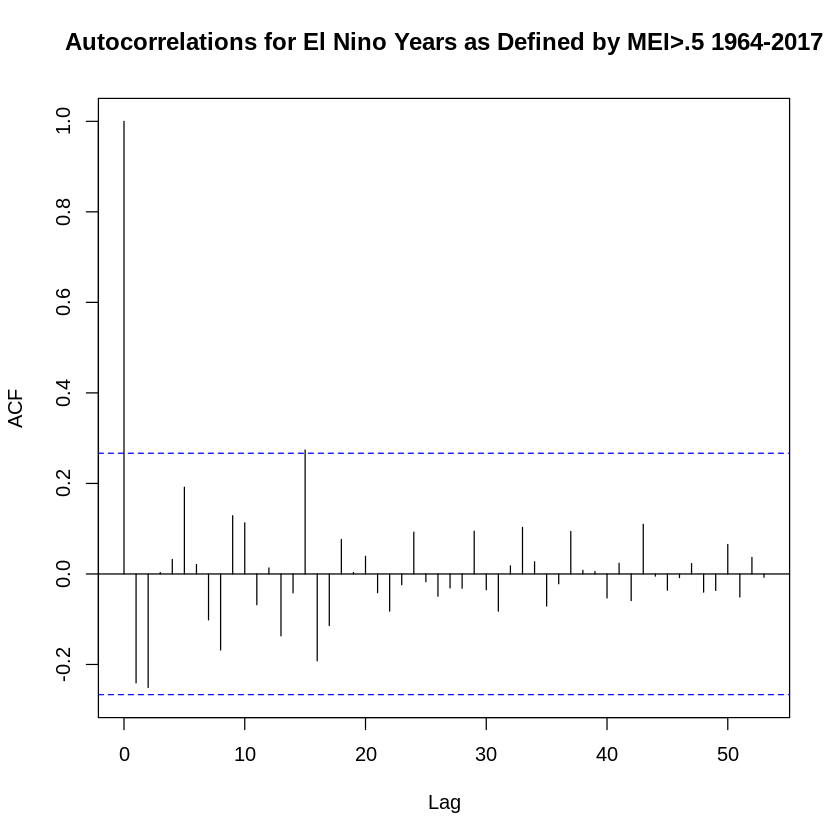

In [ ]:
plot(mei.elnino.ts, type = "l", xlab = "Year", ylab = "MEI", main = "El Nino Years as Defined by MEI>.5 1964-2017")
mei.elnino.p <- period.wge(mei.elnino.ts, dbcalc=TRUE, plot=TRUE)
mei.elnino.parz <- parzen.wge(mei.elnino.ts)
mei.elnino.acf <- acf(mei.elnino.ts, lag.max=100, main = "Autocorrelations for El Nino Years as Defined by MEI>.5 1964-2017")

In [ ]:
x <- which.max(mei.elnino.p$pgram)
y <- mei.elnino.p$freq[x]
cat("The dominant frequency is", y, "\n")
cat("The corresponding period is", 1/y, "\n")
x2 <- which.max(mei.elnino.p$pgram[0:10])
y2 <- mei.elnino.p$freq[x2]
cat("The dominant frequency is", y2, "\n")
cat("The corresponding period is", 1/y2, "\n")

The dominant frequency is 0.2037037 
The corresponding period is 4.909091 
The dominant frequency is 0.1851852 
The corresponding period is 5.4 


Below, I conduct a time series analysis of data for when the MEI value in Dec-Jan time frame indicates an El Niño event at a strong or very strong intensity.

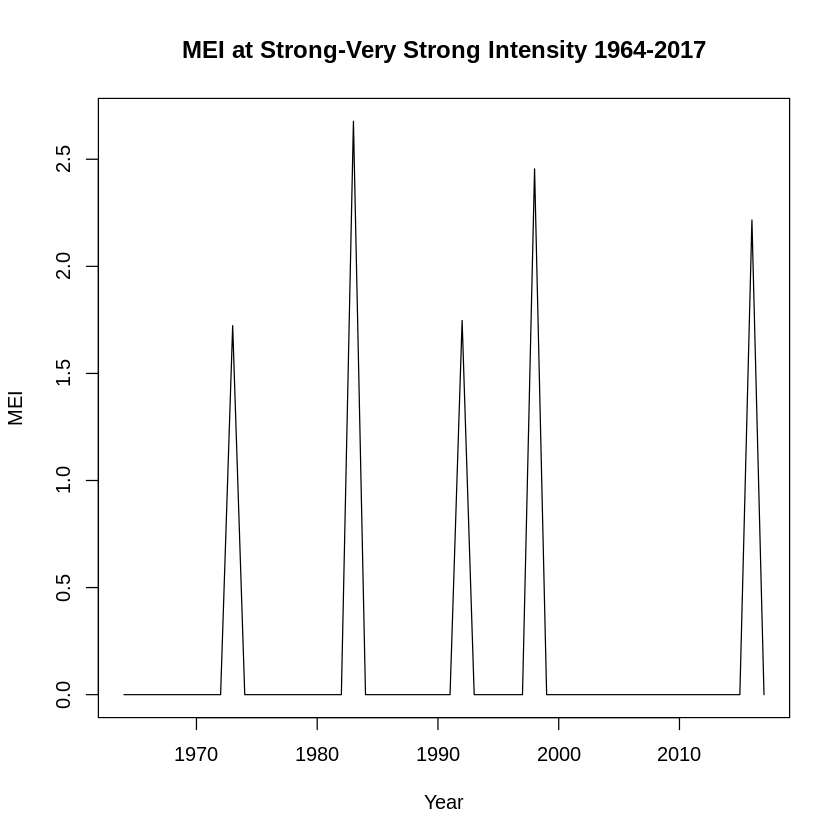

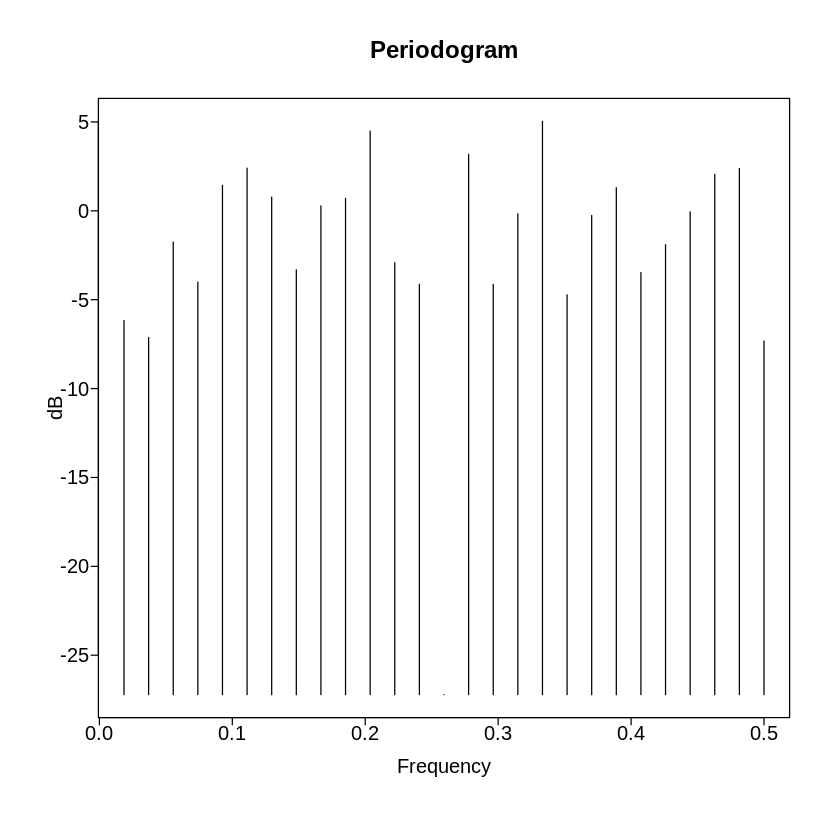

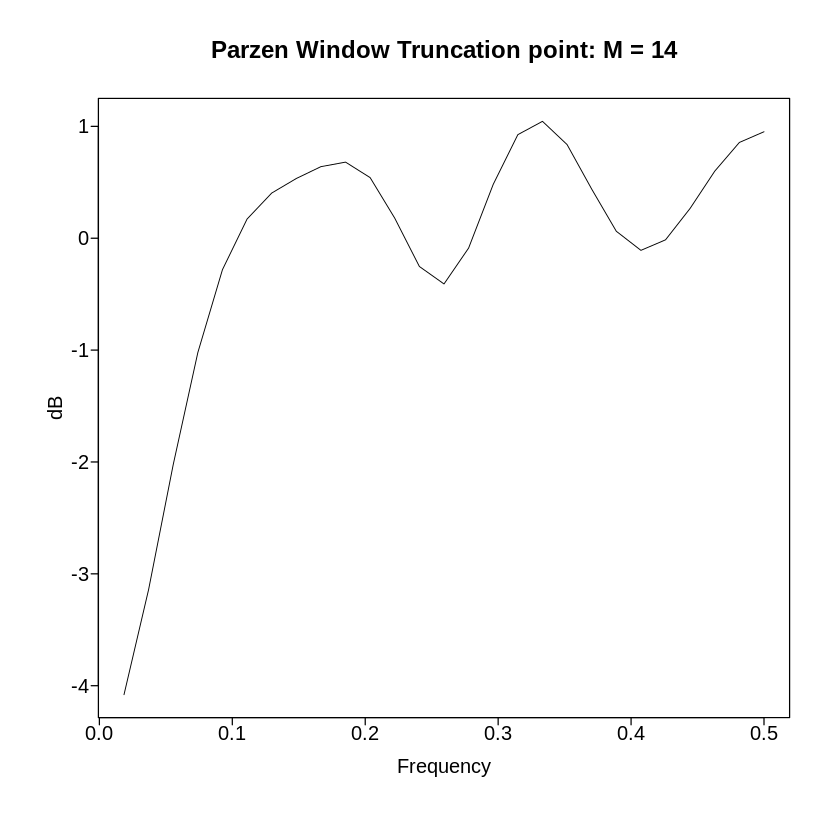

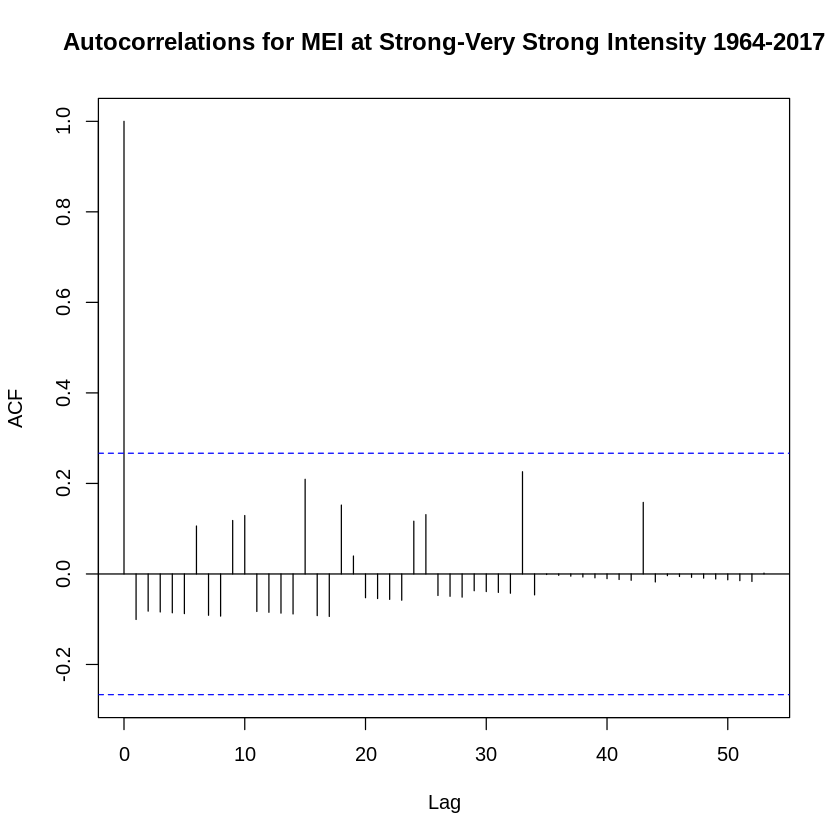

In [ ]:
plot(mei.svs.ts, type = "l", xlab = "Year", ylab = "MEI", main = "MEI at Strong-Very Strong Intensity 1964-2017")
mei.svs.p <- period.wge(mei.svs.ts, dbcalc=TRUE, plot=TRUE)
mei.svs.parz <- parzen.wge(mei.svs.ts)
mei.svs.acf <- acf(mei.svs.ts, lag.max=100, main = "Autocorrelations for MEI at Strong-Very Strong Intensity 1964-2017")

Below, I conduct a time series analysis of data for when the MEI value in Dec-Jan time frame indicates an El Niño event at a weak or moderate intensity.

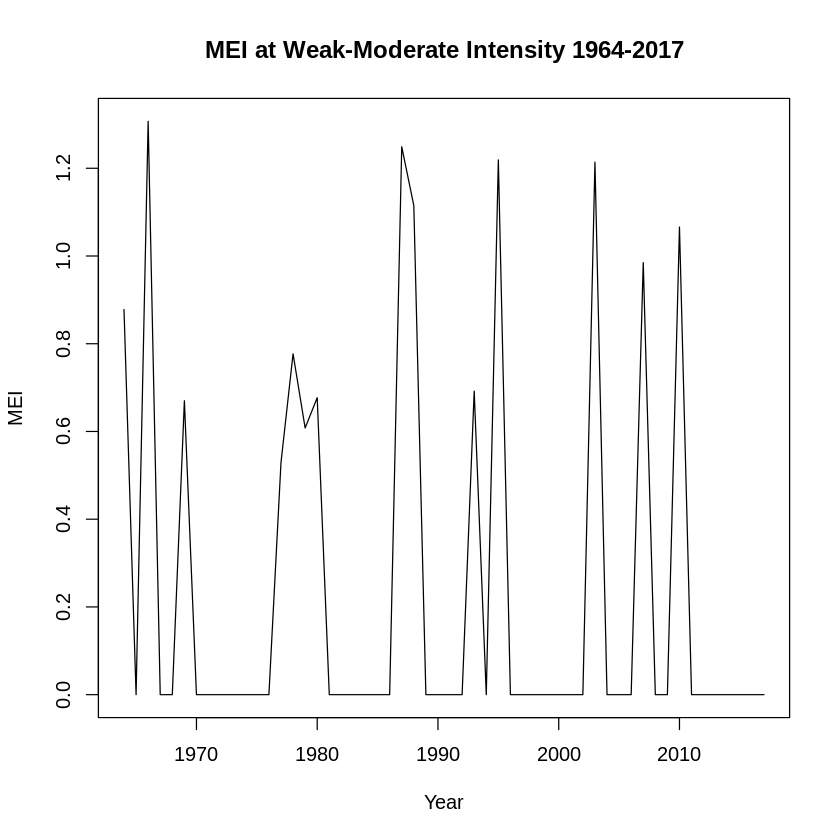

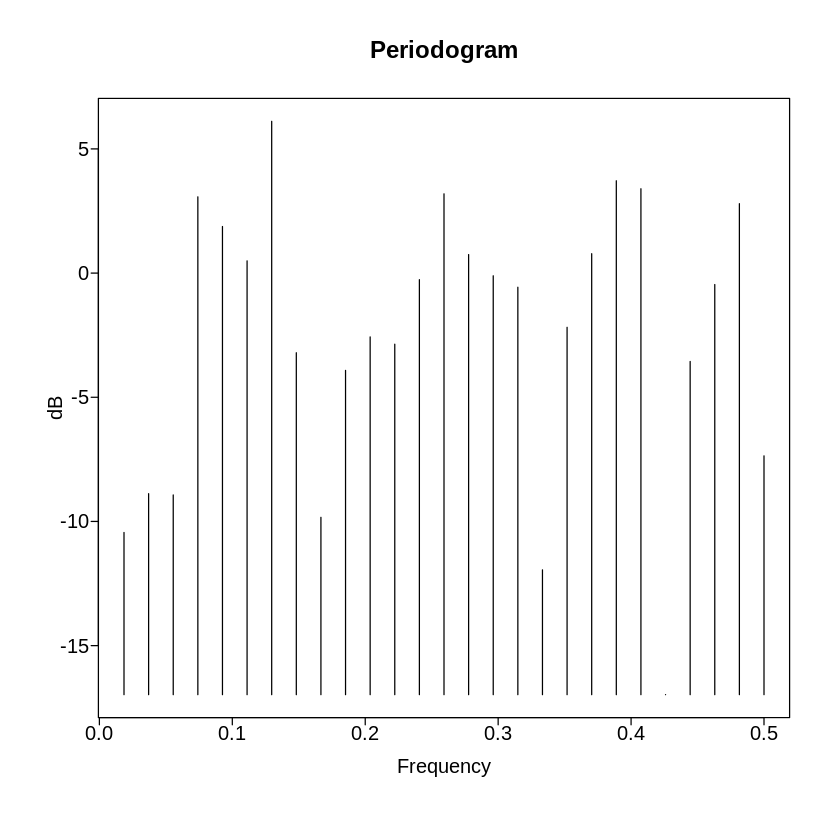

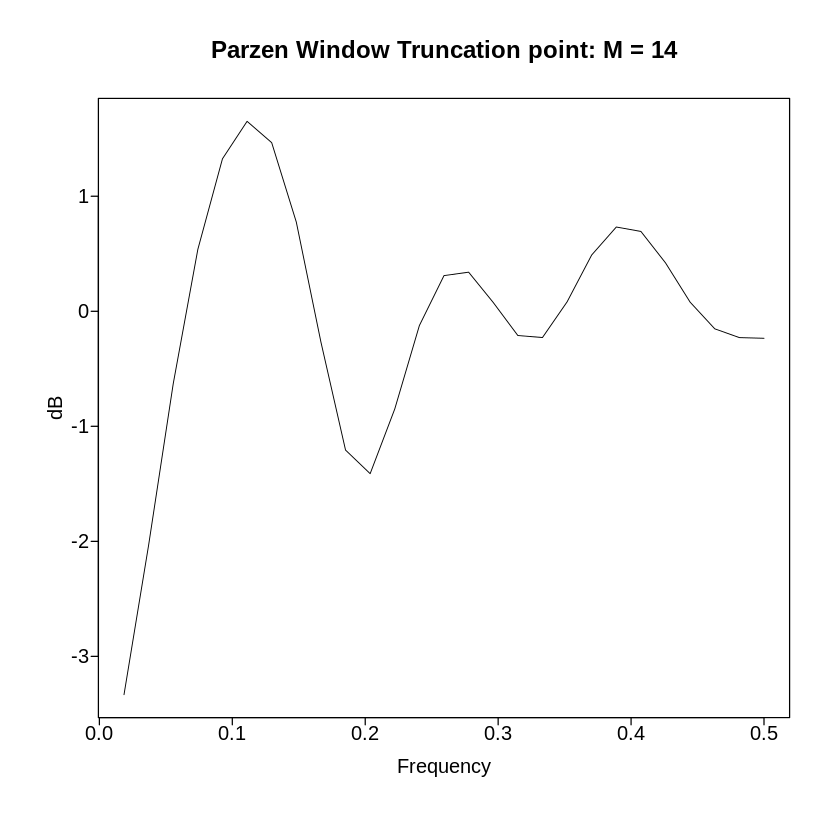

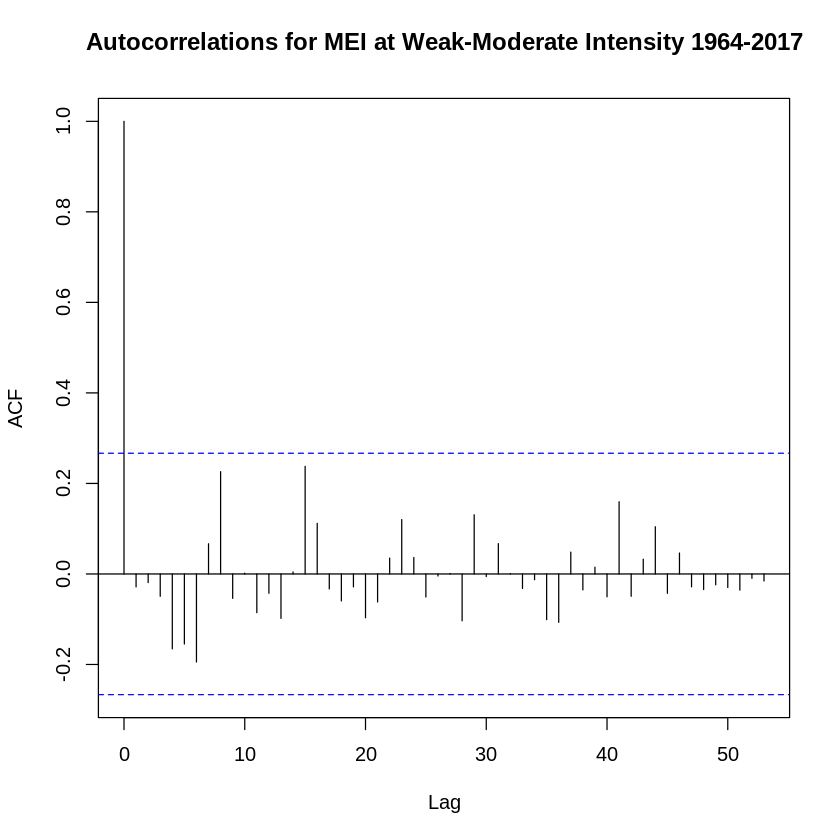

In [ ]:
plot(mei.wm.ts, type = "l", xlab = "Year", ylab = "MEI", main = "MEI at Weak-Moderate Intensity 1964-2017")
mei.wm.p <- period.wge(mei.wm.ts, dbcalc=TRUE, plot=TRUE)
mei.wm.parz <- parzen.wge(mei.wm.ts)
mei.wm.acf <- acf(mei.wm.ts, lag.max=100, main = "Autocorrelations for MEI at Weak-Moderate Intensity 1964-2017")

I investigate PAD rates per 1000 people using a time series analysis.

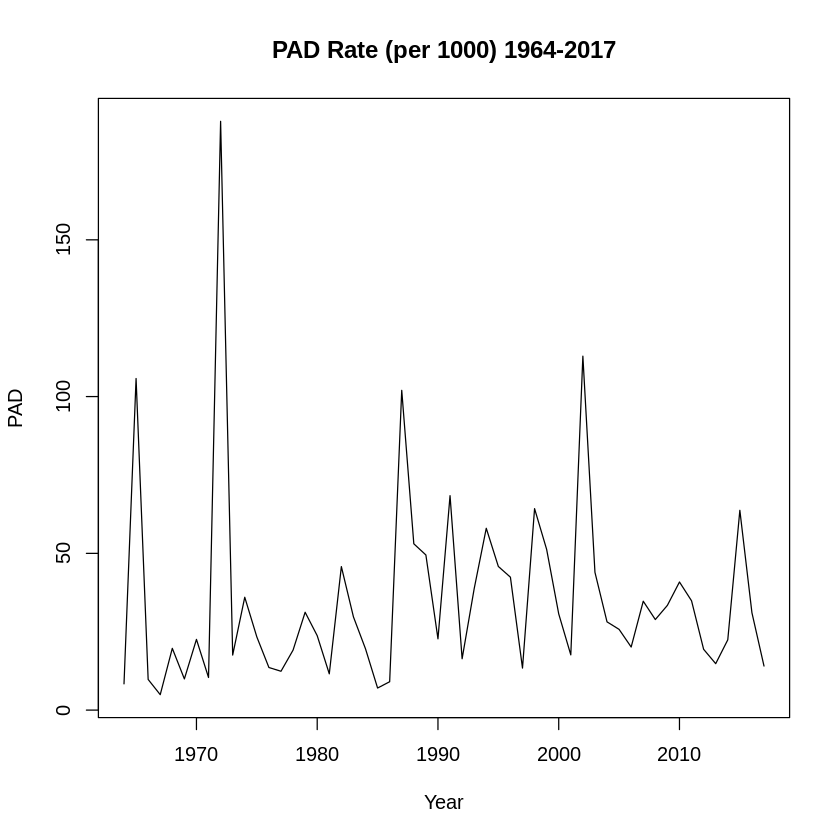

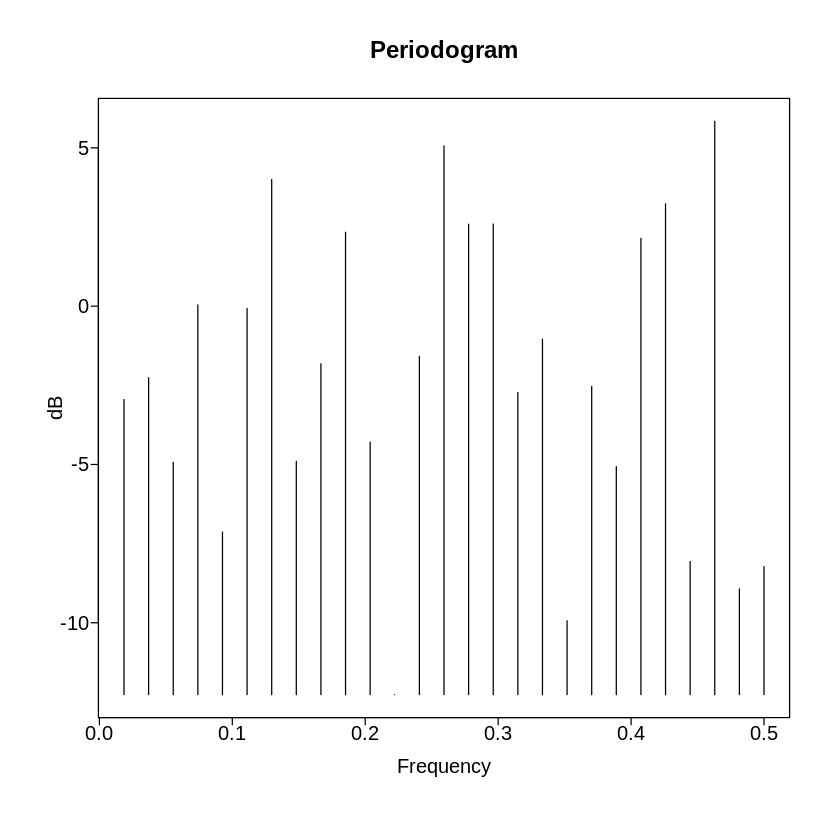

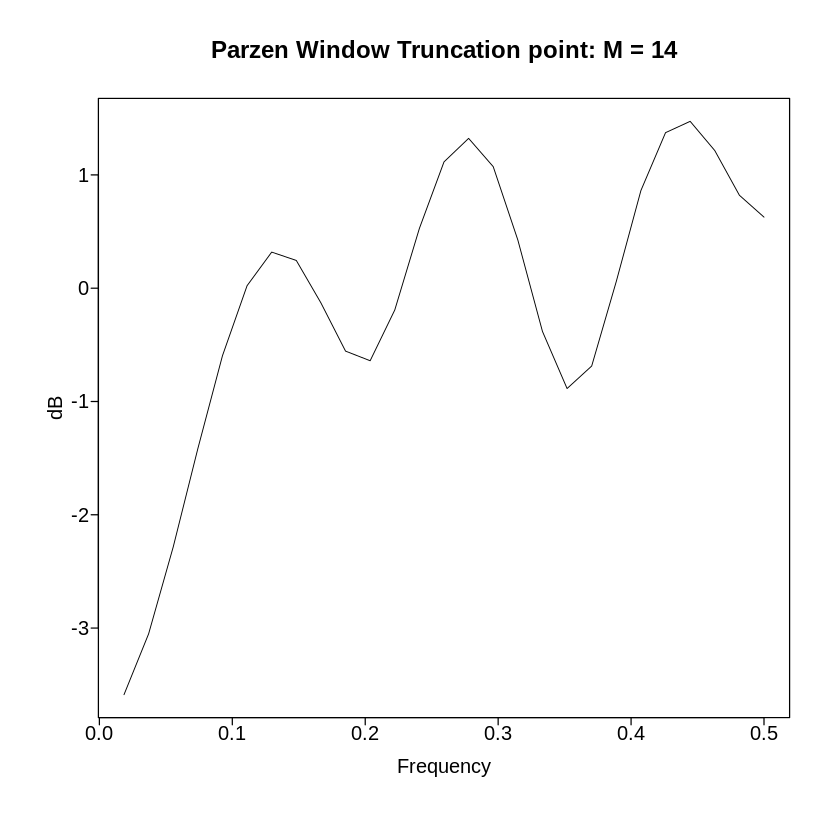

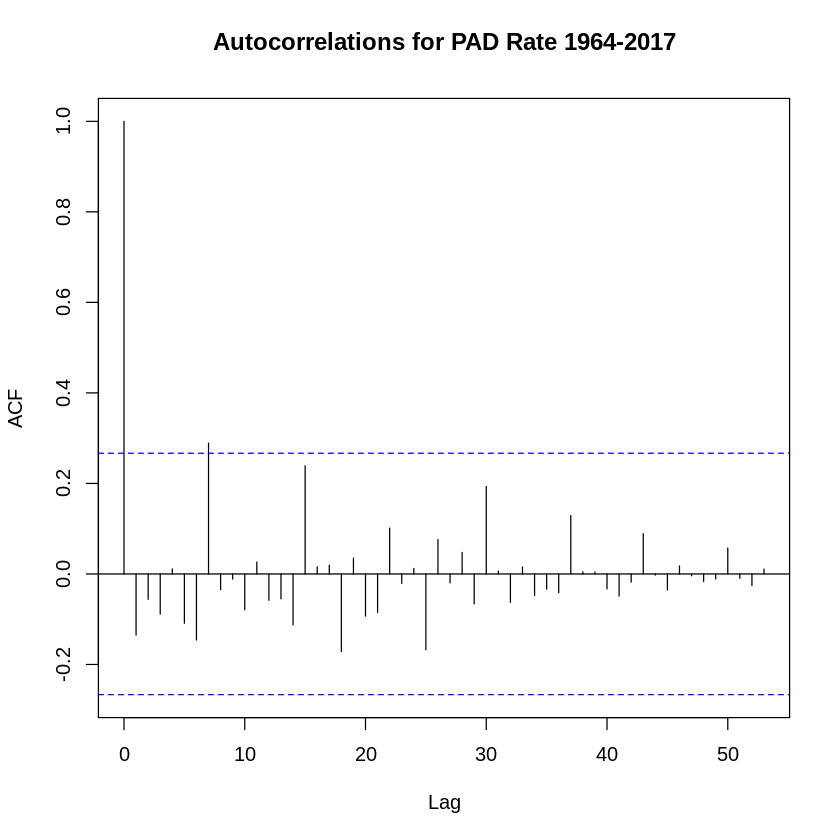

In [ ]:
plot(padrate.ts, type = "l", xlab = "Year", ylab = "PAD", main = "PAD Rate (per 1000) 1964-2017")
padrate.p <- period.wge(padrate.ts, dbcalc=TRUE, plot=TRUE)
padrate.parzen <- parzen.wge(padrate.ts)
padrate.acf <- acf(padrate.ts, lag.max=100, main = "Autocorrelations for PAD Rate 1964-2017")

In [ ]:
x <- which.max(padrate.p$pgram)
y <- padrate.p$freq[x]
cat("The dominant frequency is", y, "\n")
cat("The corresponding period is", 1/y, "\n")
x2 <- which.max(padrate.p$pgram[0:24])
y2 <- padrate.p$freq[x2]
cat("The second dominant frequency is", y2, "\n")
cat("The corresponding period is", 1/y2, "\n")
x3 <- which.max(padrate.p$pgram[0:13])
y3 <- padrate.p$freq[x3]
cat("The third dominant frequency is", y3, "\n")
cat("The corresponding period is", 1/y3, "\n")

The dominant frequency is 0.462963 
The corresponding period is 2.16 
The second dominant frequency is 0.2592593 
The corresponding period is 3.857143 
The third dominant frequency is 0.1296296 
The corresponding period is 7.714286 


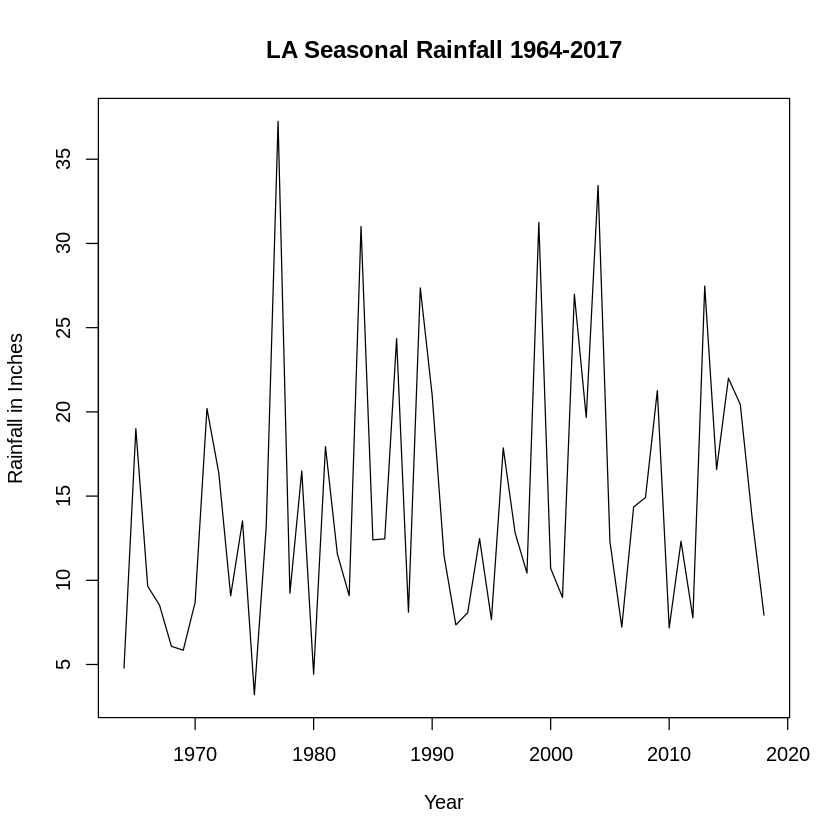

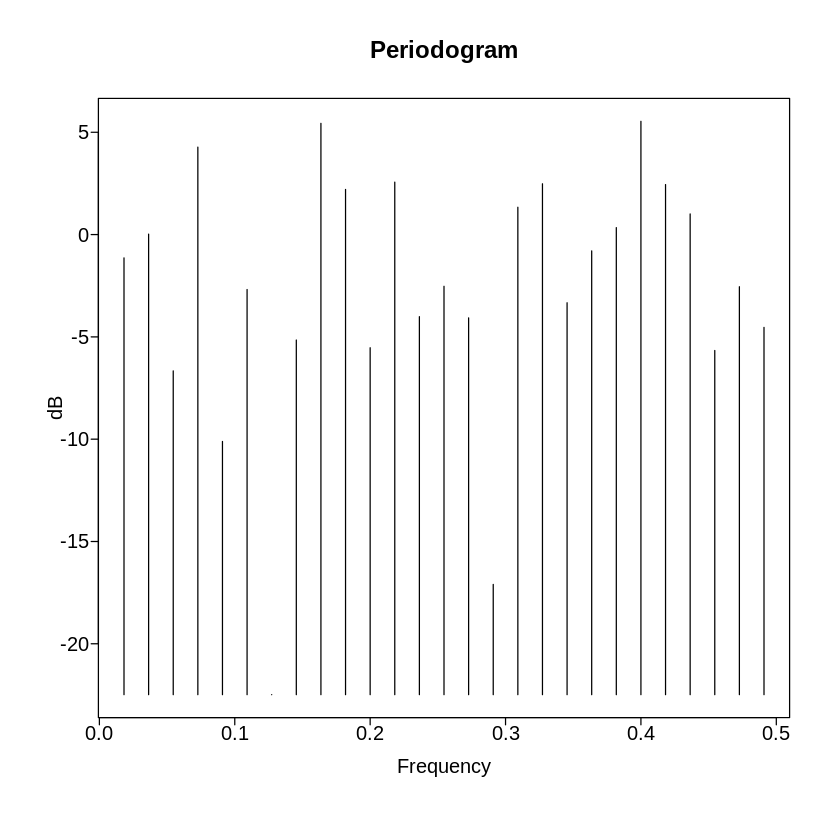

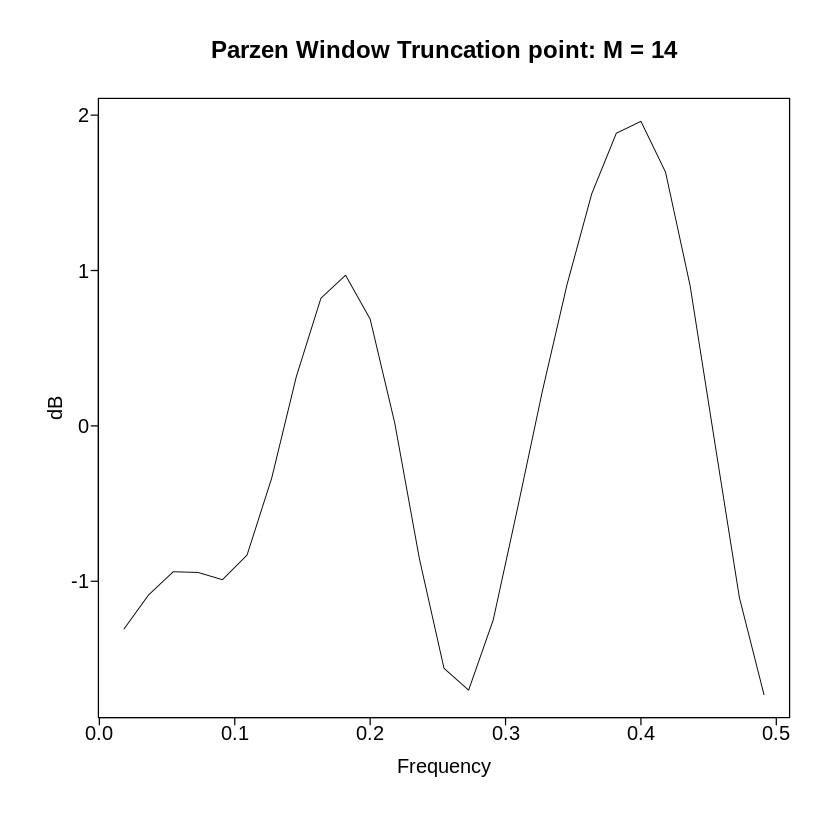

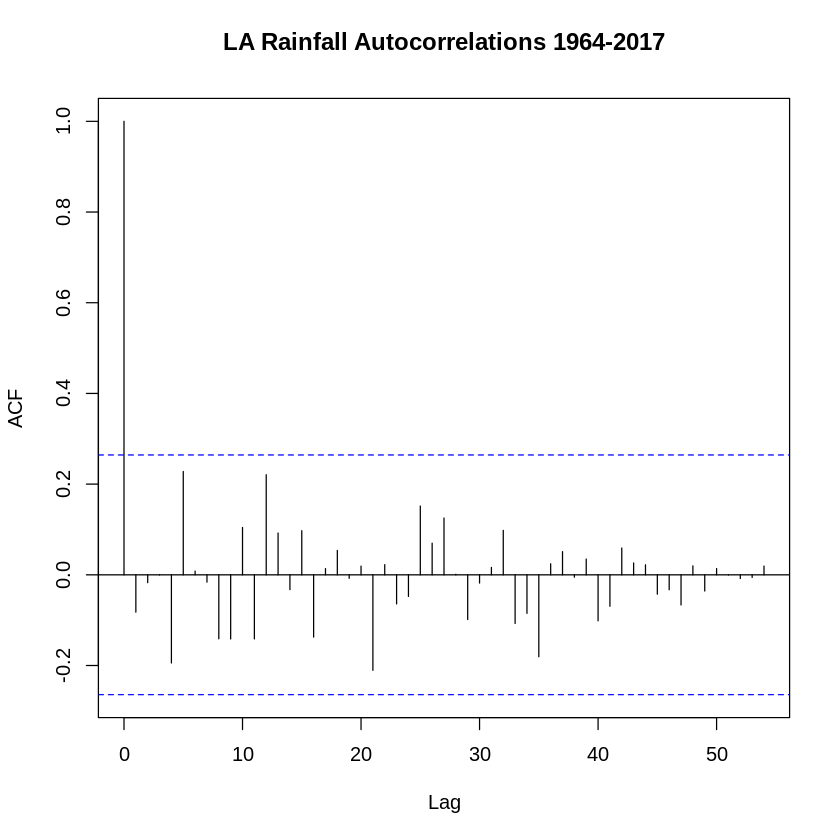

In [ ]:
plot(rainfall.ts, type = "l", xlab = "Year", ylab = "Rainfall in Inches", main = "LA Seasonal Rainfall 1964-2017")
rainfall.p <- period.wge(rainfall.ts, dbcalc=TRUE, plot=TRUE)
rainfall.parz <- parzen.wge(rainfall.ts)
rainfall.acf <- acf(rainfall.ts, lag.max=100, main = "LA Rainfall Autocorrelations 1964-2017")

In [ ]:
x <- which.max(rainfall.p$pgram)
y <- (rainfall.p$freq[x])
cat("The dominant frequency equals", y,"\n")
cat("Period equals", 1/y, "years", "\n")
x2 <- which.max(rainfall.p$pgram[0:21])
y2 <- (rainfall.p$freq[x2])
cat("The dominant frequency equals", y2,"\n")
cat("Period equals", 1/y2, "years")

The dominant frequency equals 0.4 
Period equals 2.5 years 
The dominant frequency equals 0.1636364 
Period equals 6.111111 years

# Discussion and Conclusions


I investigated each dataset I deemed relevant using a time series analysis. These datasets include the complete data for MEI and ONI, data for MEI and ONI in only El Ni&ntilde;o years, data for MEI and ONI in El Ni&ntilde;o years with strong and very strong intensities and weak and moderate intensities, PAD rate data and LA rainfall data. I specifically examined realizations, periodograms, Parzen windows, and plots of the sample autocorrelation function to determine dominant frequencies and periods. I was able to find patterns in the data; a lot of the data was found to be periodic, and the length of periods in multiple datasets were very similar - perhaps in some cases indicating an association.

#### Time Series Analysis of ONI Data

The dominant frequencies for the dataset containing all ONI values are .023 and .015, which correspond to periods of 43.2 months (3.6 years) and 64.8 months (5.4 years) respectively. This shows that the ONI data is indeed periodic. The autocorrelation function does not show that their is a particular lag with a major correlation.

The ONI data for El Nino years demonstrates dominant frequencies of about .278 and .185, corresponding to periods of 3.6 years and 5.4 years. This means that El Nino events have a trend of occurring every 3.6 and 5.4 years. There are positive correlations at lags of around 5, 9, 15, 18, 28, 33, 35, 38, 43, 45, 48, and 51, which is consistent with periods of 3.6 and 5.4 years. 

The ONI data in which all values are set to zero except those indicating El Nino events with strong and very strong intensity has clear dominant frequencies as shown by the Parzen Window. These dominant frequencies are .333 and .111, corresponding to periods of 3 and 9 years. 

The ONI data in which all values are set to zero except those indicating El Nino events with weak and moderate intensity has also has clear dominant frequencies as shown by the Parzen Window. These dominant frequencies are .389, .1296, and .111, corresponding to perios of 2.6 years, 7.7 years, and 9 years respectively.

#### Time Series Analysis of MEI Data

The dominant frequencies for the dataset containing all MEI values are .023 and .015, which correspond to periods of 43.2 months (3.6 years) and 64.8 months (5.4 years) respectively. It was strange that the dominant frequencies and periods of the MEI data were the exact same as those of the ONI data. I thought that perhaps I made a mistake in my code, but I could not find one.

Due to the similarity between ONI and MEI data, I curtailed my investigation into MEI data for El Ni&ntilde;o years and El Ni&ntilde;o intensity levels. I did discover that the dominant frequencies for MEI in El Ni&ntilde;o years equal .204 and .185, corresponding to periods of 4.91 years and 5.4 years respectively. This shows that, based on the MEI index, El Ni&ntilde;o events occur about once every five years. This is about what I expected for the frequency of El Ni&ntilde;o events.

#### Time Series Analysis of PAD Data


There were three dominant frequencies for the PAD rate data: .463, .026, and .13. These correspond to periods of 2.16 years, 3.86 years, and 7.7 years. There were correlations at lags of about 7, 14, 21, 30, 37, and 43. However, it is unclear if this matches up with ENSO. The realization shows that there were five years where the PAD rate was much greater than the other years in the dataset. Given more time, I would like to see if these years correspond to El Ni&ntilde;o years, particularly those with strong or very strong intensity.

#### Time Series Analysis of Rainfall in LA

The dominant frequencies for rainfall are .4 and .164, which correspond to periods of 2.5 and 6.11 years. The lengths of these periods are similar to the lengths of periods for El Ni&ntilde;o events. It seems like there could be an association between ENSO rainfall in LA. The LA rainfall time series displays correlations at lags of about 5, 11, 14, 18, 24, 26, 27, 32, 38, 39, and 42. 

The mean seasonal rainfall is 14.6 inches, and the standard deviation is 7.98 inches. The seasons with rainfall more than one standard deviation above the mean are 1968-1969, 1972-1973, 1977-1978, 1979-1980, 1982-1983, 1992-1993,1994-1995, 2004-2005, and 2010-2011. Interestingly enough, all of these seasons contain at least one year in which an El Nino event is observed (as defined by an ONI measurement > 5 in the Dec-Feb period). 

#### Identifying El Ni&ntilde;o years


I identified El Ni&ntilde;o years using ONI and MEI indices greater than .5 at the end of the calendar year. These years include: 1964, 1966, 1969, 1970, 1973, 1977, 1978, 1980, 1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, 2015, and 2016.

#### Challenges

My first major challenge was figuring out how to process the data. It was very helpful to have Professor Davis's help and code snippets to use to accomplish this. 
My second major challenge was determining the association between ENSO and PAD and between ENSO and seasonal rainfall in LA. Although there are similar period lengths, there does not seem to be a clear correlation. 

# References (APA)

Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Tyler Davis. Retrieved from https://colab.research.google.com/drive/1LQYV32w2alxA8AMwlJC2PHjAyfs58I5M?usp=sharing 

EM-DAT. (1964-2017). Customized EM-DAT dataset. EM-DAT. Retrieved from https://public.emdat.be/

Lam, H. C. Y., Haines, A., McGregor, G., Chan, E. Y. Y., & Hajat, S. (2019). Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle. International Journal of Environmental Research and Public Health, 16(17), 3146. MDPI AG. Retrieved from http://dx.doi.org/10.3390/ijerph16173146

Los Angeles Almanac. (1877-2020). Total Seasonal Rainfall (Precipitation).  Los Angeles Almanac. Retrieved from http://www.laalmanac.com/weather/we13.php 

NOAA. (1979-2021). Multivariate ENSO Index Version 2 (MEI.v2). NOAA. Retrieved from https://psl.noaa.gov/enso/mei/data/meiv2.data. 

NOAA. (1950-2021). ONI from CPC. NOAA/PSL. Retrieved from https://psl.noaa.gov/data/correlation/oni.data

World Bank. (1960-2019). Population, total. World Bank Group. Retrieved from https://data.worldbank.org/indicator/SP.POP.TOTL 

